
## Projet 2 : Analyse des données de systèmes éducatifs


# 1. Importation de packages et définition de fonctions

In [1]:
# Impotation librairies
import pandas as pd 
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#********************** Modification des affichages***********************************************
###pd.set_option('display.max_columns', 200)
##pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_colwidth', None)

In [3]:
#********************************** Calcule des valeurs nulles + pourcentage: ******************************
def calc_inf (df,line):
    
    # ****************** Définition des variabes************************************************************
    nb_line_nan = nb_line_mix = nb_line_ssna= nb_col_nan = nb_col_mix = nb_col_ssna = 0   
         
    #***************************************************** Les statistiques NaN par colonne*****************
    
    n_list = df.isnull().sum().tolist()
    for i in range(len(n_list)):
        if n_list[i] == 0:                     # Nombre de colonnes sans NaN
            nb_col_ssna += 1  
        elif n_list[i] == len(df):             # Nombre de colonnes nulles
            nb_col_nan += 1
        elif 0 < n_list[i] < len(df):          # Nombre de colonnes mixtes
            nb_col_mix += 1
    print("* Nombre de colonnes sans NaN -------:",nb_col_ssna)
    print("* Nombre de colonnes NaN ------------:", nb_col_nan)
    print("* Nombre de colonnes mixtes----------:",nb_col_mix)
   # *************************************** Les statistiques NaN par ligne ********************************

    if line == True:
        for j in range(len(df.index)) :
            if df.iloc[j].isnull().sum() == len(df.columns):         # Nombre de lignes nulles
                nb_line_nan += 1
            elif 0 < df.iloc[j].isnull().sum() < len(df.columns):    # Nombre de lignes mixtes
                nb_line_mix += 1
            elif df.iloc[j].isnull().sum() == 0:                     # Nombre de lignes sans NaN
                nb_line_ssna += 1
        print("* Nombre de ligne entièrement nulles :",nb_line_nan)  
        print("* Nombre de ligne mixtes ----------- :", nb_line_mix) 
        print("* Nombre de ligne sans NaN ----------:", nb_line_ssna)
    #*******************************************************************************************************
    nb_line = df.index.size
    nb_colonne = df.columns.size
    tot = (nb_colonne*nb_line)
    nan = df.isnull().sum().sum()
    nan_prcnt = (100 * nan) / tot
    not_nan = df.notna().sum().sum()
    not_nan_prcnt = float((100 * not_nan) / tot)
    
    print("* Nombre de lignes -----------------------: {:.0f}".format(nb_line))
    print("* Nombre de colonnes ---------------------: {:.0f}".format(nb_colonne))
    print("* Nombre de cases ------------------------: {:.0f}".format(tot))
    print("* Nombre de valeurs nulles ---------------: {:.0f}".format(nan))
    print("* Nombre de valeurs non nulles -----------: {:.0f}".format(not_nan))
    print("* le pourcentage des valeurs nulles ------:",str("%.1f" % nan_prcnt) + ' %')
    print("* le pourcentage des valeurs non nulles --:",str("%.1f" % not_nan_prcnt) + ' %')
    #a = pd.concat([not_nan_prcnt,nan_prcnt])
    t= [not_nan_prcnt, nan_prcnt]
    plt.pie(t, labels = ['Valeurs non nulles', 
                         'Valeurs nulles (NaN)'],colors =['c', 'r'],
            startangle = 90, shadow = True, explode =(0,0.1),
            autopct = "%1.1f%%", normalize = True)
    plt.title("Le taux de remplissage en %")
    plt.show()

# 2. Analyse et découverte les fichiers de données. 

# 2. 1 EdStatsCountry  


In [4]:
# Lire le fichier CSV EdStatsCountry
country = pd.read_csv("D:\Projet Classrooms\EdStatsCountry.csv")

In [5]:
# Garder une copie du fichier "EdStatsCountry"
country_orgn = country.copy()

In [6]:
country

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [7]:
country.shape

(241, 32)

In [8]:
country["Region"].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 1
* Nombre de colonnes mixtes----------: 27
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 241
* Nombre de ligne sans NaN ----------: 0
* Nombre de lignes -----------------------: 241
* Nombre de colonnes ---------------------: 32
* Nombre de cases ------------------------: 7712
* Nombre de valeurs nulles ---------------: 2354
* Nombre de valeurs non nulles -----------: 5358
* le pourcentage des valeurs nulles ------: 30.5 %
* le pourcentage des valeurs non nulles --: 69.5 %


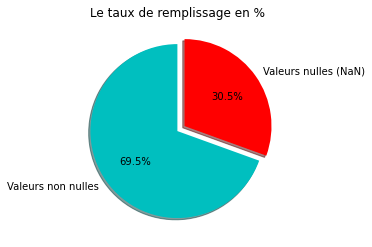

In [9]:
calc_inf(country,True)

Le fichier "Country" contient dans la colonne "Short Name" des régions ainsi que des pays, il faut isoler les pays des régions puis supprimer les trois lignes qui ne sont pas des pays: 

* 'High income',
* 'Low income',
* 'Upper middle income',
### En dessous la liste des régions à isoler "region"  

In [10]:
region = ['Arab World',
          'East Asia & Pacific',
          'East Asia & Pacific (excluding high income)',
          'East Asia & Pacific (developing only)',
          'East Asia & Pacific (all income levels)',
          'Euro area',
          'European Union',
          'Europe & Central Asia',
          'Europe & Central Asia (excluding high income)',
          'Europe & Central Asia (developing only)',
          'Europe & Central Asia (all income levels)',
          'European Union',
          'Heavily indebted poor countries (HIPC)',
          'High income',
          'Latin America & Caribbean',
          'Latin America & Caribbean (developing only)',
          'Latin America & Caribbean (excluding high income)',
          'Least developed countries: UN classification',
          'Low & middle income',
          'Low income',
          'Lower middle income',
          'Middle East & North Africa',
          'Middle East & North Africa (excluding high income)',
          'Middle East & North Africa (all income levels)',
          'Middle East & North Africa (developing only)',
          'Middle income',
          'North America',
          'OECD members',
          'South Asia',
          'Sub-Saharan Africa',
          'Sub-Saharan Africa (excluding high income)',
          'Upper middle income',
          'World',
        ]

In [11]:
List_pays = country[~country['Short Name'].isin(region)]['Short Name'].unique()
List_pays.shape

(219,)

In [12]:
country = country[["Country Code","Short Name","Region","Income Group"]] 
country.head(30)


,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
5,ARB,Arab World,NaN,NaN
6,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD
7,ARG,Argentina,Latin America & Caribbean,Upper middle income
8,ARM,Armenia,Europe & Central Asia,Lower middle income
9,ASM,American Samoa,East Asia & Pacific,Upper middle income


In [13]:
#data_country[data_country["Region"].notna()].head()
country[country["Region"].isna()]

,Country Code,Short Name,Region,Income Group
5,ARB,Arab World,NaN,NaN
57,EAP,East Asia & Pacific (developing only),NaN,NaN
58,EAS,East Asia & Pacific (all income levels),NaN,NaN
59,ECA,Europe & Central Asia (developing only),NaN,NaN
60,ECS,Europe & Central Asia (all income levels),NaN,NaN
63,EMU,Euro area,NaN,NaN
68,EUU,European Union,NaN,NaN
78,GIB,Gibraltar,NaN,NaN
89,HIC,High income,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN,NaN


In [14]:
country = country.dropna()

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 0
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 0
* Nombre de ligne sans NaN ----------: 214
* Nombre de lignes -----------------------: 214
* Nombre de colonnes ---------------------: 4
* Nombre de cases ------------------------: 856
* Nombre de valeurs nulles ---------------: 0
* Nombre de valeurs non nulles -----------: 856
* le pourcentage des valeurs nulles ------: 0.0 %
* le pourcentage des valeurs non nulles --: 100.0 %


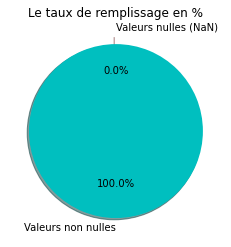

In [15]:
calc_inf(country,True)

In [16]:
country.shape

(214, 4)

# 2. 2 EdStatsSeries  

In [17]:
series = pd.read_csv("D:\Projet Classrooms\EdStatsSeries.csv")

In [18]:
series_orgn = series.copy()

In [19]:
series.shape

(3665, 21)

In [20]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

* Nombre de colonnes sans NaN -------: 5
* Nombre de colonnes NaN ------------: 6
* Nombre de colonnes mixtes----------: 10
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 3665
* Nombre de ligne sans NaN ----------: 0
* Nombre de lignes -----------------------: 3665
* Nombre de colonnes ---------------------: 21
* Nombre de cases ------------------------: 76965
* Nombre de valeurs nulles ---------------: 55203
* Nombre de valeurs non nulles -----------: 21762
* le pourcentage des valeurs nulles ------: 71.7 %
* le pourcentage des valeurs non nulles --: 28.3 %


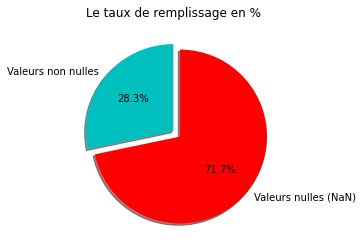

In [21]:
calc_inf(series,True)

In [22]:
series

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_series = series[["Series Code","Topic","Indicator Name","Long definition"]].copy()
data_series

,Series Code,Topic,Indicator Name,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...
...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,"Average total (current, capital and transfers)..."
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,"Average total (current, capital and transfers)..."
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,"Average total (current, capital and transfers)..."
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go..."


* Nombre de colonnes sans NaN -------: 5
* Nombre de colonnes NaN ------------: 6
* Nombre de colonnes mixtes----------: 10
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 3665
* Nombre de ligne sans NaN ----------: 0
* Nombre de lignes -----------------------: 3665
* Nombre de colonnes ---------------------: 21
* Nombre de cases ------------------------: 76965
* Nombre de valeurs nulles ---------------: 55203
* Nombre de valeurs non nulles -----------: 21762
* le pourcentage des valeurs nulles ------: 71.7 %
* le pourcentage des valeurs non nulles --: 28.3 %


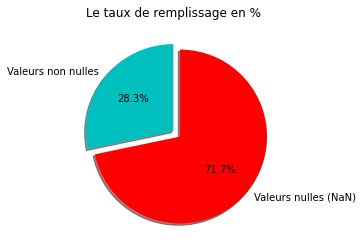

In [24]:
calc_inf(series, True)

<AxesSubplot:>

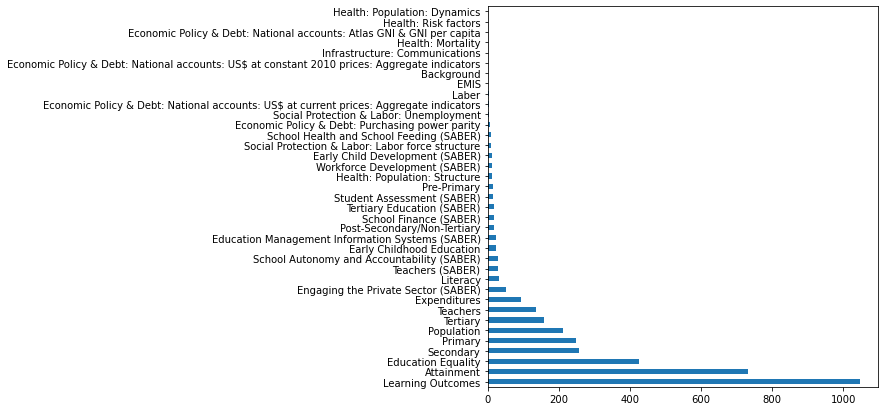

In [25]:
data_series["Topic"].value_counts().plot(kind= "barh", figsize = (7, 7))

In [26]:
data_series["Topic"].value_counts()

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

In [27]:
data_series["Topic"].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [28]:
topic_slct = ['Attainment',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Literacy','Primary', 'Secondary', 'Tertiary', 'Expenditures',
       'Social Protection & Labor: Labor force structure', 'Laber',
       'Health: Population: Structure', 'Population',
       'Health: Population: Dynamics',
       'Post-Secondary/Non-Tertiary']

In [29]:
data_series_new = data_series[data_series["Topic"].isin(topic_slct)]
data_series_new.shape

(2840, 4)

In [30]:
data_series_new["Topic"].value_counts()

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Expenditures                                                                                      93
Literacy                                                                                          32
Post-Secondary/Non-Tertiary                                                                       19
Health: Population: Structure                                                              

In [31]:
data_series.shape


(3665, 4)

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 0
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 0
* Nombre de ligne sans NaN ----------: 3665
* Nombre de lignes -----------------------: 3665
* Nombre de colonnes ---------------------: 4
* Nombre de cases ------------------------: 14660
* Nombre de valeurs nulles ---------------: 0
* Nombre de valeurs non nulles -----------: 14660
* le pourcentage des valeurs nulles ------: 0.0 %
* le pourcentage des valeurs non nulles --: 100.0 %


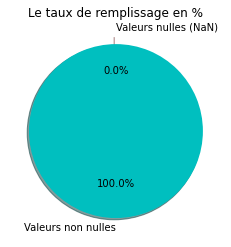

In [32]:
calc_inf(data_series,True)

In [33]:
data_series[data_series["Series Code"] == "UIS.E.3"],
data_series[data_series["Series Code"] == "SE.TER.ENRL"],
data_series[data_series["Series Code"] == "BAR.TER.CMPT.25UP.ZS"],
data_series[data_series["Series Code"] == "IT.NET.USER.P2"]

,Series Code,Topic,Indicator Name,Long definition
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...


In [34]:
rows = [ ('UIS.E.3', 'Secondary', 'Enrolment in upper secondary education, both sexes (number)' , "Total number of students enrolled in public and private upper secondary education institutions regardless of age.") ,
                 ('SE.TER.ENRL', 'Tertiary', 'Enrolment in tertiary education, all programmes, both sexes (number)' , "The total number of students enrolled at public and private tertiary education institutions." ) ,
                 ('BAR.TER.CMPT.25UP.ZS', 'Attainment', 'Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary' , "Percentage of population age 25+ with tertiary schooling. Completed Tertiary ") ,
                 ("IT.NET.USER.P2","Infrastructure: Communications","Internet users (per 100 people)","Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc") ]

In [35]:
df_series = pd.DataFrame(rows,columns=["Series Code","Topic","Indicator Name","Long definition" ])     
df_series

,Series Code,Topic,Indicator Name,Long definition
0,UIS.E.3,Secondary,"Enrolment in upper secondary education, both s...",Total number of students enrolled in public an...
1,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",The total number of students enrolled at publi...
2,BAR.TER.CMPT.25UP.ZS,Attainment,Barro-Lee: Percentage of population age 25+ wi...,Percentage of population age 25+ with tertiary...
3,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...


In [36]:
df_series.shape

(4, 4)

# 2. 3  EdStatsFootNote

In [37]:
FootNote = pd.read_csv("D:\Projet Classrooms\EdStatsFootNote.csv")

In [38]:
FootNote_orgn = FootNote.copy()

In [39]:
FootNote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [40]:
FootNote.shape

(643638, 5)

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 1
* Nombre de colonnes mixtes----------: 0
* Nombre de lignes -----------------------: 643638
* Nombre de colonnes ---------------------: 5
* Nombre de cases ------------------------: 3218190
* Nombre de valeurs nulles ---------------: 643638
* Nombre de valeurs non nulles -----------: 2574552
* le pourcentage des valeurs nulles ------: 20.0 %
* le pourcentage des valeurs non nulles --: 80.0 %


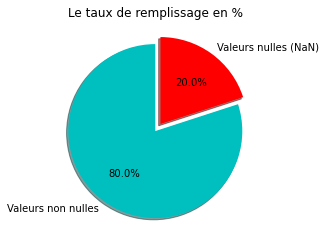

In [41]:
calc_inf(FootNote, False)

In [42]:
FootNote_flt = FootNote.dropna(axis = "columns")

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 0
* Nombre de lignes -----------------------: 643638
* Nombre de colonnes ---------------------: 4
* Nombre de cases ------------------------: 2574552
* Nombre de valeurs nulles ---------------: 0
* Nombre de valeurs non nulles -----------: 2574552
* le pourcentage des valeurs nulles ------: 0.0 %
* le pourcentage des valeurs non nulles --: 100.0 %


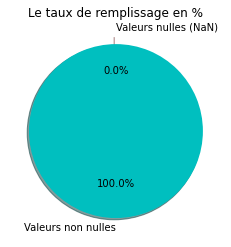

In [43]:
calc_inf(FootNote_flt, False)

In [44]:
FootNote_flt["CountryCode"].unique()


array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI',
       'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY',
       'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA',
       'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG',
       'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LKA',
       'LMC', 'LMY',

# 2. 4  EdStatsCountry-Series

In [45]:
country_series = pd.read_csv("D:\Projet Classrooms\EdStatsCountry-Series.csv")

In [46]:
country_series_org = country_series.copy()
country_series

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


* Nombre de colonnes sans NaN -------: 3
* Nombre de colonnes NaN ------------: 1
* Nombre de colonnes mixtes----------: 0
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 613
* Nombre de ligne sans NaN ----------: 0
* Nombre de lignes -----------------------: 613
* Nombre de colonnes ---------------------: 4
* Nombre de cases ------------------------: 2452
* Nombre de valeurs nulles ---------------: 613
* Nombre de valeurs non nulles -----------: 1839
* le pourcentage des valeurs nulles ------: 25.0 %
* le pourcentage des valeurs non nulles --: 75.0 %


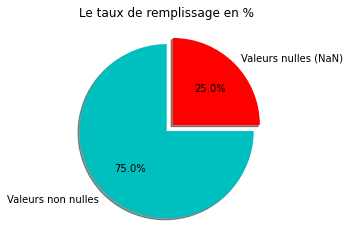

In [47]:
calc_inf(country_series, True)

* Nombre de colonnes sans NaN -------: 3
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 0
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 0
* Nombre de ligne sans NaN ----------: 613
* Nombre de lignes -----------------------: 613
* Nombre de colonnes ---------------------: 3
* Nombre de cases ------------------------: 1839
* Nombre de valeurs nulles ---------------: 0
* Nombre de valeurs non nulles -----------: 1839
* le pourcentage des valeurs nulles ------: 0.0 %
* le pourcentage des valeurs non nulles --: 100.0 %


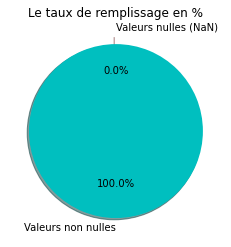

In [48]:
country_series = country_series.drop(columns= ["Unnamed: 3"])
calc_inf(country_series, True)

# 2. 5 EdStatsData

In [49]:
EdStatsData = pd.read_csv("D:\Projet Classrooms\EdStatsData.csv")

In [50]:
EdStatsData_orgn = EdStatsData.copy()

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 1
* Nombre de colonnes mixtes----------: 65
* Nombre de lignes -----------------------: 886930
* Nombre de colonnes ---------------------: 70
* Nombre de cases ------------------------: 62085100
* Nombre de valeurs nulles ---------------: 53455179
* Nombre de valeurs non nulles -----------: 8629921
* le pourcentage des valeurs nulles ------: 86.1 %
* le pourcentage des valeurs non nulles --: 13.9 %


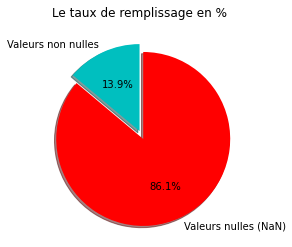

In [51]:
calc_inf(EdStatsData, False)

In [52]:
EdStatsData.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Le merge de country et EdStatsData pour avoir une liste des pays avec des régions dans countries

In [53]:
countries_merge = EdStatsData.merge(right = country[['Country Code', 'Region']], on='Country Code', how='left')
countries_merge

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [54]:
cnt_rgn = countries_merge["Country Name"].isin(region)
countries = countries_merge[~cnt_rgn]
countries.shape

(795305, 71)

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 1
* Nombre de colonnes mixtes----------: 66
* Nombre de lignes -----------------------: 795305
* Nombre de colonnes ---------------------: 71
* Nombre de cases ------------------------: 56466655
* Nombre de valeurs nulles ---------------: 47706881
* Nombre de valeurs non nulles -----------: 8759774
* le pourcentage des valeurs nulles ------: 84.5 %
* le pourcentage des valeurs non nulles --: 15.5 %


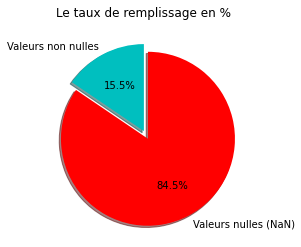

In [55]:
calc_inf(countries, False)

In [56]:
countries = countries.drop(columns = ["2017","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070",
                                       "2075","2080","2085","2090","2095","2100","Unnamed: 69"])

***Le nombre de pays et régions dans Country est 241 et dans EdStatsData 242 pays et régions "British Virgin Islands" de plus***


* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 48
* Nombre de lignes -----------------------: 795305
* Nombre de colonnes ---------------------: 52
* Nombre de cases ------------------------: 41355860
* Nombre de valeurs nulles ---------------: 33465405
* Nombre de valeurs non nulles -----------: 7890455
* le pourcentage des valeurs nulles ------: 80.9 %
* le pourcentage des valeurs non nulles --: 19.1 %


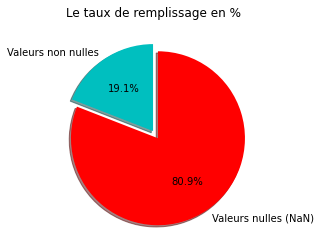

In [57]:
calc_inf(countries, False)

In [58]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795305 entries, 91625 to 886929
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    795305 non-null  object 
 1   Country Code    795305 non-null  object 
 2   Indicator Name  795305 non-null  object 
 3   Indicator Code  795305 non-null  object 
 4   1970            68581 non-null   float64
 5   1971            31713 non-null   float64
 6   1972            31629 non-null   float64
 7   1973            31432 non-null   float64
 8   1974            31586 non-null   float64
 9   1975            83077 non-null   float64
 10  1976            33211 non-null   float64
 11  1977            33283 non-null   float64
 12  1978            33279 non-null   float64
 13  1979            32470 non-null   float64
 14  1980            84684 non-null   float64
 15  1981            34314 non-null   float64
 16  1982            33044 non-null   float64
 17  1983  

# 3. Sélection des indicateurs





   # 3. 1 Premier indicateur : SP.POP.TOTL
   
   * Nombre de popullation totale par pays et régions

In [59]:
code_pop_total = ["SP.POP.TOTL"]

In [60]:
pop_tot = countries["Indicator Code"].isin(code_pop_total)
pop_total = countries[pop_tot]

pop_total[pop_total["2016"].isna()]


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region
193113,British Virgin Islands,VGB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277408,Curacao,CUW,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,144971.0,145890.0,149311.0,150612.0,152056.0,153500.0,NaN,NaN,NaN,Latin America & Caribbean
317723,Eritrea,ERI,"Population, total",SP.POP.TOTL,1811878.0,1861199.0,1912302.0,1965160.0,2019717.0,2075965.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
596263,Nauru,NRU,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720873,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,40459.0,39133.0,37850.0,38486.0,39088.0,39689.0,NaN,NaN,NaN,Latin America & Caribbean
742863,South Sudan,SSD,"Population, total",SP.POP.TOTL,3647097.0,3733619.0,3823781.0,3917741.0,4015666.0,4117767.0,...,9118386.0,9520571.0,9940929.0,10381110.0,10837527.0,11296173.0,NaN,NaN,NaN,Sub-Saharan Africa
761188,St. Martin (French part),MAF,"Population, total",SP.POP.TOTL,5450.0,5601.0,5756.0,5915.0,6078.0,6291.0,...,29376.0,29820.0,30235.0,30615.0,30959.0,31264.0,NaN,NaN,NaN,Latin America & Caribbean


**La suppréssion des lignes [193113, 596263] qui sont vides, puis entre l'année "2011" et "2016" sont les colonnes qui contiennent plus de données, on prend l'année 2016 pour récupérer les dernières stats, concernant les entries vides ce sont des pays qui ne sont pas importants pour notre analyse. ***

* comme illustré en dessous l'année 2011 a toutes les données d'entrées mais pas les plus récentes de pop_total, donc on prend l'année 2016 :

    * pop_total = pop_total.drop([193113, 596263])
    * pop_total.isnull().sum() : 
    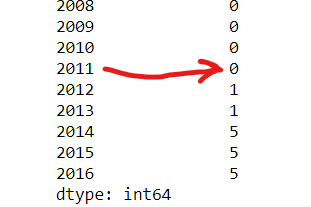


In [61]:
pop_total = pop_total.dropna()
pop_total[pop_total["2016"].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region


In [62]:
# population totale par pays et région pour l'années 2016
pop_2016 = pop_total[["Country Name","Country Code","2016", "Region"]].copy()

***Après la limination des cases vides comme illustré au-dessus, il reste que 206 lignes qui correspondent au nombre des pays restants, maintenant, il reste que à sélectionner la liste des pays supérieur à la median via la méthode describe().*** 

In [63]:
pop_2016.shape

(206, 4)

In [64]:
pop_2016.describe()

,2016
count,2.060000e+02
mean,3.585180e+07
std,1.378209e+08
min,1.109700e+04
25%,9.992810e+05
50%,6.741830e+06
75%,2.470270e+07
max,1.378665e+09


In [65]:
pop_2016.median()

2016    6741830.5
dtype: float64

In [66]:
# le seuil choisi représente la median de la population totale
seuil_pop = float(pop_2016.median())
# comparaison au seuil median de la population tot 2016.
pop_2016_flt = pop_2016[pop_2016["2016"] > seuil_pop]
# mettre en ordre la pop_tot 2016 par pays.
pop_2016_flt = pop_2016_flt.sort_values(by=['2016']) 

In [67]:
pop_2016_flt.shape

(103, 4)

In [68]:
pop_2016_flt[pop_2016_flt["Country Code"] == "FRA"]


,Country Name,Country Code,2016,Region
339713,France,FRA,66896109.0,Europe & Central Asia


Text(0.5, 1.0, 'Nombre population totale par pays au-dessus de la médiane année 2016')

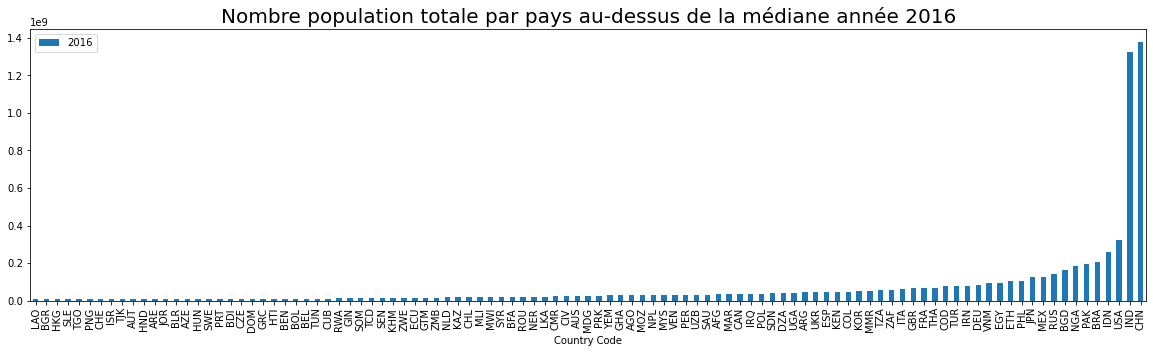

In [69]:
# la représentation de la population tot / pays en Bar chart 
pop_2016_flt.plot(kind ='bar', x ='Country Code',y ='2016', figsize = (20, 5))
plt.title('Nombre population totale par pays au-dessus de la médiane année 2016', size=20)


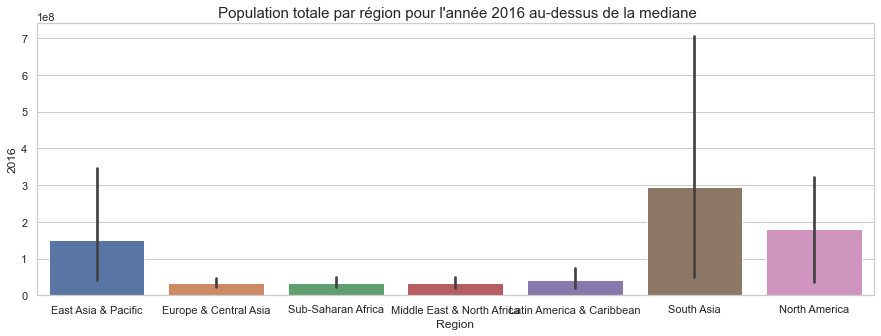

In [70]:
#sns.barplot(x = [elem1 for elem1, elem2 in mots_indicateurs_populaires], y = [elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.barplot(x = pop_2016_flt['Region'], y = pop_2016_flt['2016'])
plt.title(' Population totale par région pour l\'année 2016 au-dessus de la mediane' , size=15)
plt.show()

   # 3. 2 Deuxième indicateur : IT.NET.USER.P2

   * Nombre d'utilisateurs internet par pays et régions

In [71]:
countries["Country Name"].unique().shape

(217,)

In [72]:
int_code = ["IT.NET.USER.P2"]
int_users = countries["Indicator Code"].isin(int_code)
int_users = countries[int_users]
int_users.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1970              210
1971              217
1972              217
1973              217
1974              217
1975              210
1976              210
1977              210
1978              210
1979              210
1980              210
1981              210
1982              210
1983              210
1984              210
1985              210
1986              210
1987              210
1988              210
1989              209
1990               11
1991              178
1992              167
1993              152
1994              126
1995               79
1996               46
1997               36
1998               30
1999               23
2000               21
2001               20
2002               18
2003               24
2004               21
2005               19
2006               20
2007               13
2008               14
2009               15
2010               15
2011      

***Pareil l'année 2016 est riche de données récentes par rapport aux autres années***

In [73]:
int_users[int_users["2016"].isna()]


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region
103995,American Samoa,ASM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
191955,British Virgin Islands,VGB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235935,Channel Islands,CHI,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
276250,Curacao,CUW,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
433845,Isle of Man,IMN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
466830,"Korea, Dem. People’s Rep.",PRK,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,East Asia & Pacific
474160,Kosovo,XKX,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
595105,Nauru,NRU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606100,New Caledonia,NCL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,34.51,33.99,42.0,50.0,58.0,66.0,70.0,74.001753,NaN,East Asia & Pacific
624425,Northern Mariana Islands,MNP,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


In [74]:
#int_users.dropna()
int_users = int_users[["Country Name","Country Code","2016", "Region"]].copy()

int_users = int_users.dropna(axis= 0)
int_users.isnull().sum()

Country Name    0
Country Code    0
2016            0
Region          0
dtype: int64

In [75]:
int_users.describe()

,2016
count,200.000000
mean,51.199373
std,28.476728
min,1.177119
25%,25.336288
50%,53.613386
75%,76.234824
max,98.240016


In [76]:
int_users.median()

2016    53.613386
dtype: float64

* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 0
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 0
* Nombre de ligne sans NaN ----------: 200
* Nombre de lignes -----------------------: 200
* Nombre de colonnes ---------------------: 4
* Nombre de cases ------------------------: 800
* Nombre de valeurs nulles ---------------: 0
* Nombre de valeurs non nulles -----------: 800
* le pourcentage des valeurs nulles ------: 0.0 %
* le pourcentage des valeurs non nulles --: 100.0 %


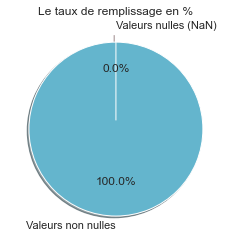

In [77]:
calc_inf(int_users, True)

In [78]:
int_users.shape

(200, 4)

In [79]:
seuil_int = float(int_users.median())
int_users_flt = int_users[int_users["2016"] > seuil_int]
int_users_flt.shape

(100, 4)

In [80]:
int_users_flt = int_users_flt.sort_values(by=['2016'])

In [81]:
int_users_flt

,Country Name,Country Code,2016,Region
738040,South Africa,ZAF,54.000000,Sub-Saharan Africa
642750,Panama,PAN,54.000000,Latin America & Caribbean
301905,Ecuador,ECU,54.062925,Latin America & Caribbean
657410,Philippines,PHL,55.500000,East Asia & Pacific
763695,St. Vincent and the Grenadines,VCT,55.574619,Latin America & Caribbean
...,...,...,...,...
107660,Andorra,AND,97.930637,Europe & Central Asia
144310,Bahrain,BHR,97.999981,Middle East & North Africa
169965,Bermuda,BMU,98.000000,North America
507145,Liechtenstein,LIE,98.093904,Europe & Central Asia


Text(0.5, 1.0, 'Internet users (per 100 people) / pays')

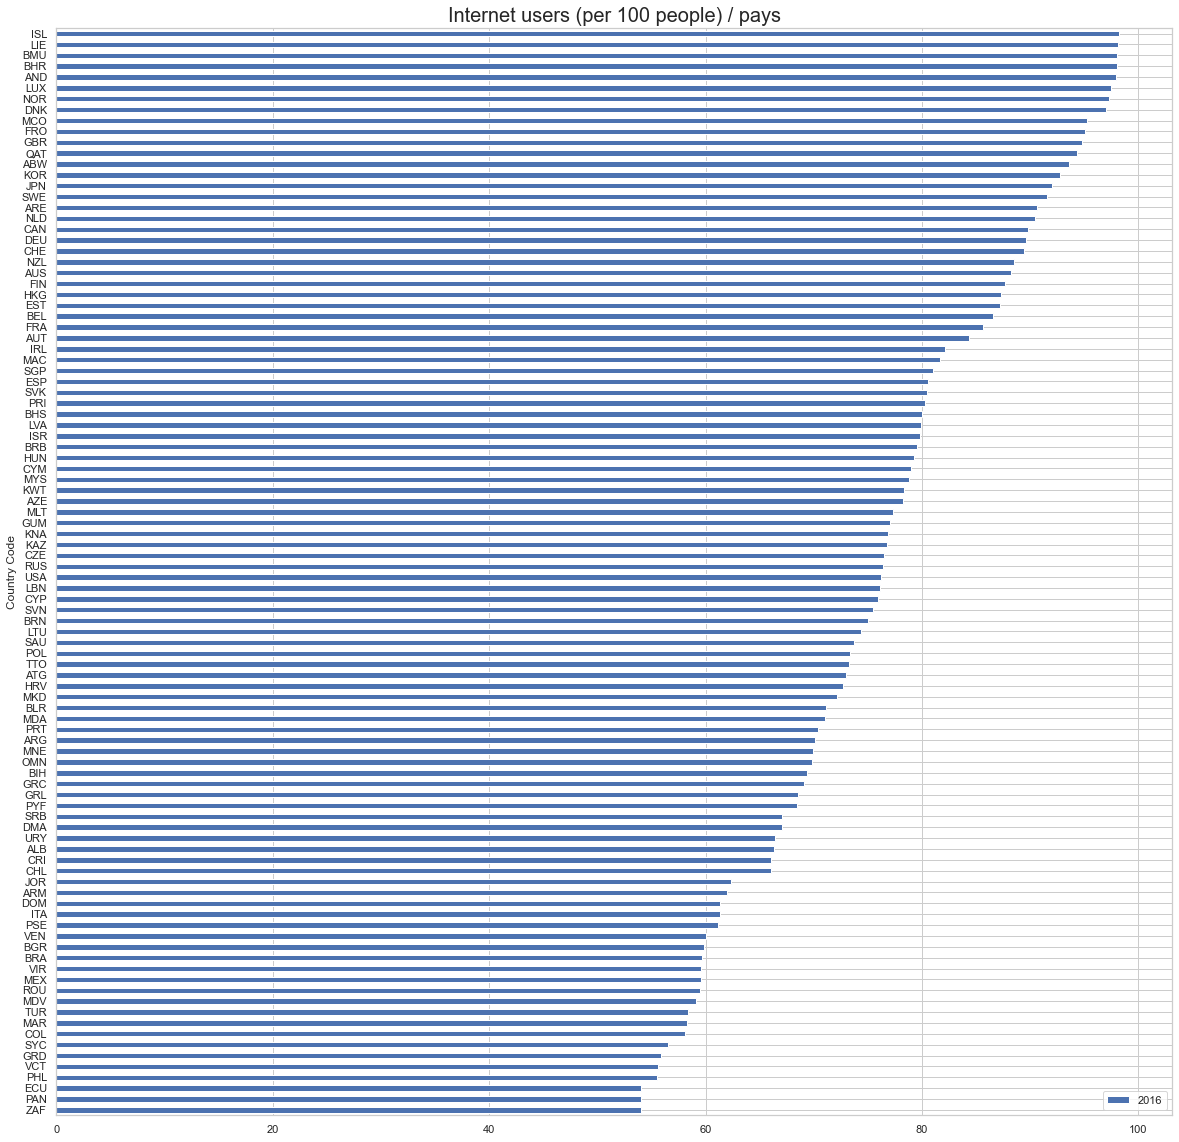

In [82]:
int_users_flt.plot(kind='barh',x='Country Code',y='2016', figsize = (20, 20))
plt.title('Internet users (per 100 people) / pays', size=20)

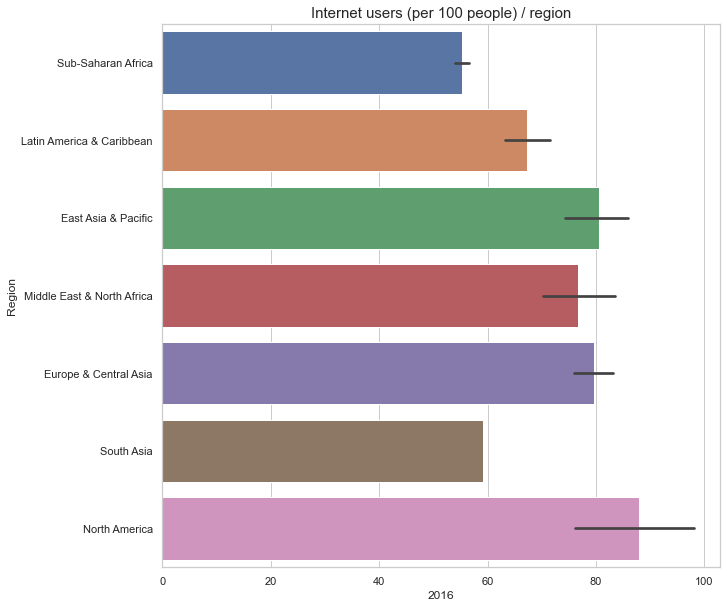

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.barplot(y = int_users_flt['Region'], x = int_users_flt['2016'])
plt.title('Internet users (per 100 people) / region' , size=15)
plt.show()

In [84]:
int_users.shape, pop_2016.shape

((200, 4), (206, 4))

In [85]:
int_c = int_users
pop_c = pop_2016
int_c.shape, pop_c.shape,

((200, 4), (206, 4))

In [86]:
int_c["Country Code"].isin(pop_c["Country Code"]).shape

(200,)

In [87]:
pop_c["Country Code"].isin(int_c["Country Code"]).shape

(206,)

In [88]:
#int_users["Country Code"].isin(pop_2011["Country Code"]).shape

diff = pop_c["Country Code"].isin(int_c["Country Code"])
diff_pays = pop_c[~diff]
diff_pays.shape

(10, 4)

In [89]:
diff = pop_c["Country Code"].isin(int_c["Country Code"])
mms_pays = pop_c[diff]
mms_pays.shape

(196, 4)

In [90]:
pop_c = pop_c.rename({"2016":"2016_pop_tot"},axis = "columns")
int_c = int_c.rename({"2016":"2016_int_usrs"},axis = "columns")


In [91]:

int_c.shape,pop_c.shape

((200, 4), (206, 4))

In [92]:
int_pop = pop_c.merge(int_c, how = 'outer')
int_pop.shape

(210, 5)

#### après avoir merger les df, avec tous les pays même on a des Nan dans qlqs uns, maintenant on pourrait entamer l'analyse bivarier

In [93]:
int_pop

,Country Name,Country Code,2016_pop_tot,Region,2016_int_usrs
0,Afghanistan,AFG,34656032.0,South Asia,10.595726
1,Albania,ALB,2876101.0,Europe & Central Asia,66.363445
2,Algeria,DZA,40606052.0,Middle East & North Africa,42.945527
3,American Samoa,ASM,55599.0,East Asia & Pacific,NaN
4,Andorra,AND,77281.0,Europe & Central Asia,97.930637
...,...,...,...,...,...
205,Zimbabwe,ZWE,16150362.0,Sub-Saharan Africa,23.119989
206,Eritrea,ERI,NaN,Sub-Saharan Africa,1.177119
207,Kuwait,KWT,NaN,Middle East & North Africa,78.367384
208,Serbia,SRB,NaN,Europe & Central Asia,67.056841


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='2016_int_usrs', ylabel='2016_pop_tot'>

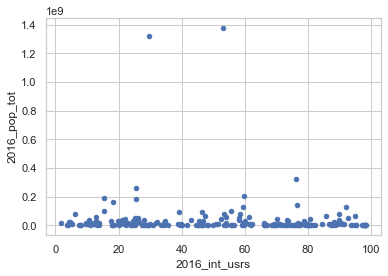

In [94]:
int_pop.plot.scatter("2016_int_usrs", "2016_pop_tot" )

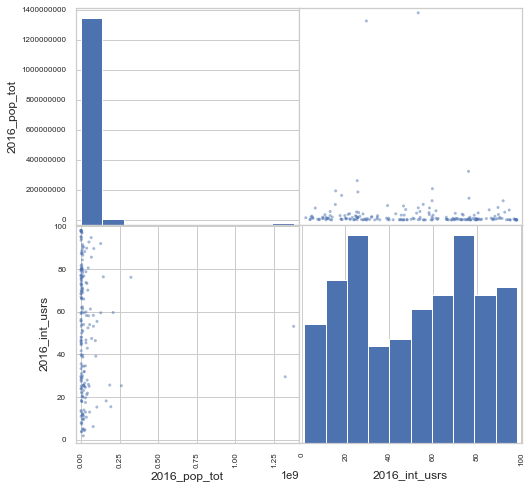

In [95]:
from pandas.plotting import scatter_matrix
scatter_matrix(int_pop, figsize =(8, 8))
plt.show()

In [96]:
#int_pop_flt = int_users_flt.merge(pop_2016_flt, how = 'outer')

int_pop_flt = int_users_flt["Country Code"].isin(pop_2016_flt["Country Code"])
int_pop_flt = int_users_flt[int_pop_flt]

#int_users_flt.shape, pop_2016_flt.shape
int_pop_flt

,Country Name,Country Code,2016,Region
738040,South Africa,ZAF,54.000000,Sub-Saharan Africa
301905,Ecuador,ECU,54.062925,Latin America & Caribbean
657410,Philippines,PHL,55.500000,East Asia & Pacific
246930,Colombia,COL,58.136494,Latin America & Caribbean
580445,Morocco,MAR,58.271236,Middle East & North Africa
818670,Turkey,TUR,58.347734,Europe & Central Asia
675735,Romania,ROU,59.503951,Europe & Central Asia
558455,Mexico,MEX,59.540446,Latin America & Caribbean
188290,Brazil,BRA,59.682747,Latin America & Caribbean
199285,Bulgaria,BGR,59.825548,Europe & Central Asia


In [97]:
lst_int_pop_flt = int_pop["Country Code"].isin(int_pop_flt["Country Code"])
lst_int_pop_flt = int_pop[lst_int_pop_flt]

In [98]:
lst_int_pop_flt

,Country Name,Country Code,2016_pop_tot,Region,2016_int_usrs
7,Argentina,ARG,43847430.0,Latin America & Caribbean,70.150764
10,Australia,AUS,24127159.0,East Asia & Pacific,88.238658
11,Austria,AUT,8747358.0,Europe & Central Asia,84.323331
12,Azerbaijan,AZE,9762274.0,Europe & Central Asia,78.200000
17,Belarus,BLR,9507120.0,Europe & Central Asia,71.113046
18,Belgium,BEL,11348159.0,Europe & Central Asia,86.516500
26,Brazil,BRA,207652865.0,Latin America & Caribbean,59.682747
28,Bulgaria,BGR,7127822.0,Europe & Central Asia,59.825548
34,Canada,CAN,36286425.0,North America,89.840000
39,Chile,CHL,17909754.0,Latin America & Caribbean,66.010000


In [99]:
lst_int_pop_flt.shape

(44, 5)

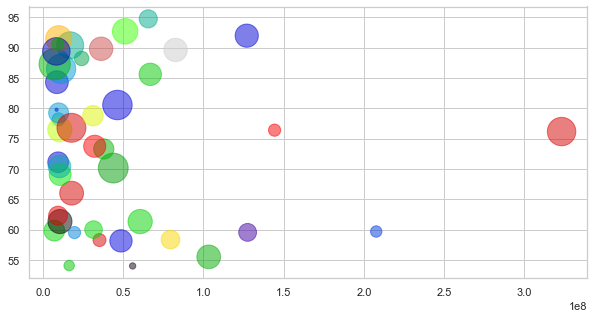

In [100]:
colors = np.random.randint(100, size=(44))
sizes = 10 * np.random.randint(100, size=(44))
plt.figure(figsize=(10, 5))
plt.scatter(lst_int_pop_flt["2016_pop_tot"],lst_int_pop_flt["2016_int_usrs"], c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.show()


   # 3. 3 Troisième indicateur : NY.GDP.PCAP.CD
    * GDP per capita (current US$) "NY.GDP.PCAP.CD" pouvoir d'achat moyen
    * PIB (produit intérieur brut) par habitant basé sur la parité de pouvoir d'achat (PPA).


* Nombre de colonnes sans NaN -------: 4
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 48
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 110
* Nombre de ligne sans NaN ----------: 107
* Nombre de lignes -----------------------: 217
* Nombre de colonnes ---------------------: 52
* Nombre de cases ------------------------: 11284
* Nombre de valeurs nulles ---------------: 2104
* Nombre de valeurs non nulles -----------: 9180
* le pourcentage des valeurs nulles ------: 18.6 %
* le pourcentage des valeurs non nulles --: 81.4 %


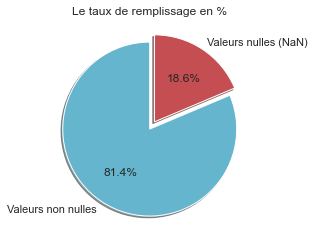

In [101]:
gdp_code = ["NY.GDP.PCAP.CD"]

gdp = countries["Indicator Code"].isin(gdp_code)
gdp = countries[gdp]
calc_inf(gdp, True)

In [102]:
gdp = gdp[["Country Name","Country Code","2016","Region"]].copy()
gdp_c = gdp.rename({"2016":"2016_gdp"},axis = "columns")
gdp_c.head(3)

,Country Name,Country Code,2016_gdp,Region
92870,Afghanistan,AFG,561.778746,South Asia
96535,Albania,ALB,4124.982390,Europe & Central Asia
100200,Algeria,DZA,3916.881571,Middle East & North Africa


In [103]:
gdp_c.isnull().sum()

Country Name     0
Country Code     0
2016_gdp        28
Region           3
dtype: int64

In [104]:
gdp_c = gdp_c.dropna(axis= 0)

In [105]:
gdp_c.isnull().sum()

Country Name    0
Country Code    0
2016_gdp        0
Region          0
dtype: int64

In [106]:
gdp_c.shape

(189, 4)

In [107]:
seuil_gdp = float(gdp_c.median())
seuil_gdp

5219.1094080464

In [108]:
gdp_c_flt = gdp_c[gdp_c["2016_gdp"] > seuil_gdp]
gdp_c_flt.shape

(94, 4)

In [109]:
gdp_int_pop_flt = gdp_c_flt["Country Code"].isin(lst_int_pop_flt["Country Code"])
gdp_int_pop_flt = gdp_c_flt[gdp_int_pop_flt]
gdp_int_pop_flt.shape

(38, 4)

In [110]:
gdp_int_pop_flt

,Country Name,Country Code,2016_gdp,Region
118525,Argentina,ARG,12440.320982,Latin America & Caribbean
129520,Australia,AUS,49927.819509,East Asia & Pacific
133185,Austria,AUT,44676.345835,Europe & Central Asia
158840,Belgium,BEL,41236.266589,Europe & Central Asia
188160,Brazil,BRA,8649.948492,Latin America & Caribbean
199155,Bulgaria,BGR,7469.025247,Europe & Central Asia
221145,Canada,CAN,42157.927991,North America
239470,Chile,CHL,13792.926054,Latin America & Caribbean
246800,Colombia,COL,5805.605385,Latin America & Caribbean
283450,Czech Republic,CZE,18491.940112,Europe & Central Asia


In [111]:
gdp_int_pop = int_pop.merge(right = gdp_c, how = 'outer')
#right = country[['Country Code', 'Region']], on='Country Code', how='left'
gdp_int_pop.shape

(210, 6)

In [112]:
gdp_int_pop

,Country Name,Country Code,2016_pop_tot,Region,2016_int_usrs,2016_gdp
0,Afghanistan,AFG,34656032.0,South Asia,10.595726,561.778746
1,Albania,ALB,2876101.0,Europe & Central Asia,66.363445,4124.982390
2,Algeria,DZA,40606052.0,Middle East & North Africa,42.945527,3916.881571
3,American Samoa,ASM,55599.0,East Asia & Pacific,NaN,11834.745229
4,Andorra,AND,77281.0,Europe & Central Asia,97.930637,36988.622030
...,...,...,...,...,...,...
205,Zimbabwe,ZWE,16150362.0,Sub-Saharan Africa,23.119989,1029.076649
206,Eritrea,ERI,NaN,Sub-Saharan Africa,1.177119,NaN
207,Kuwait,KWT,NaN,Middle East & North Africa,78.367384,27359.230330
208,Serbia,SRB,NaN,Europe & Central Asia,67.056841,5426.897946


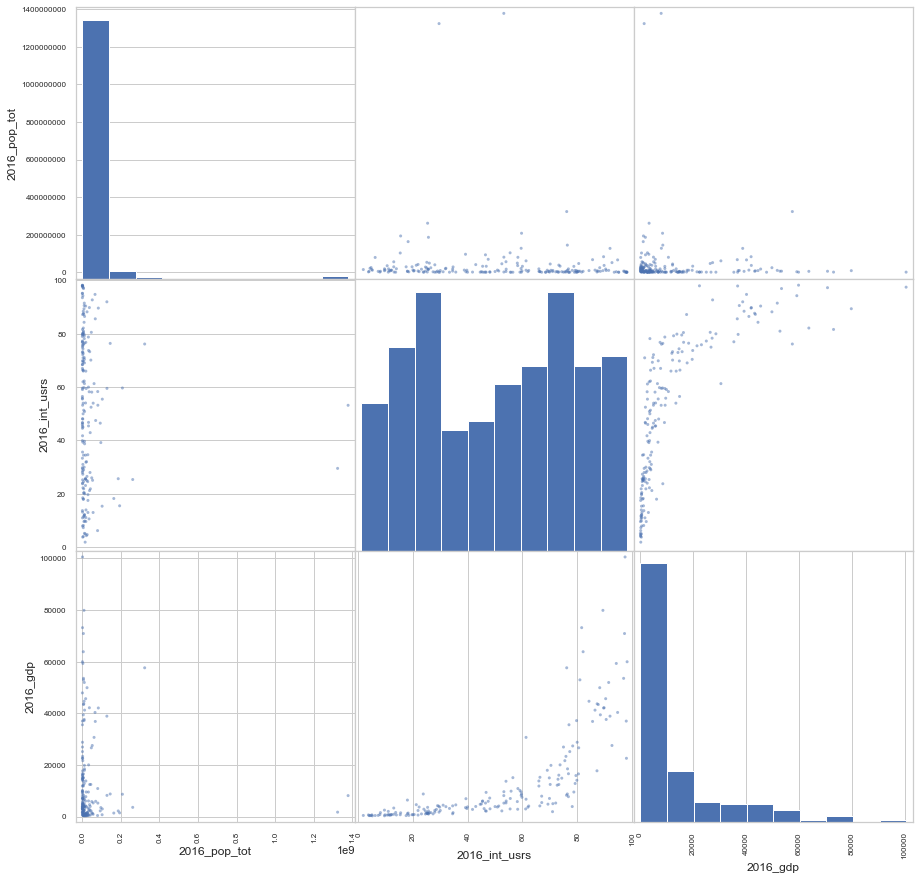

In [113]:
scatter_matrix(gdp_int_pop, figsize =(15, 15))
plt.show()


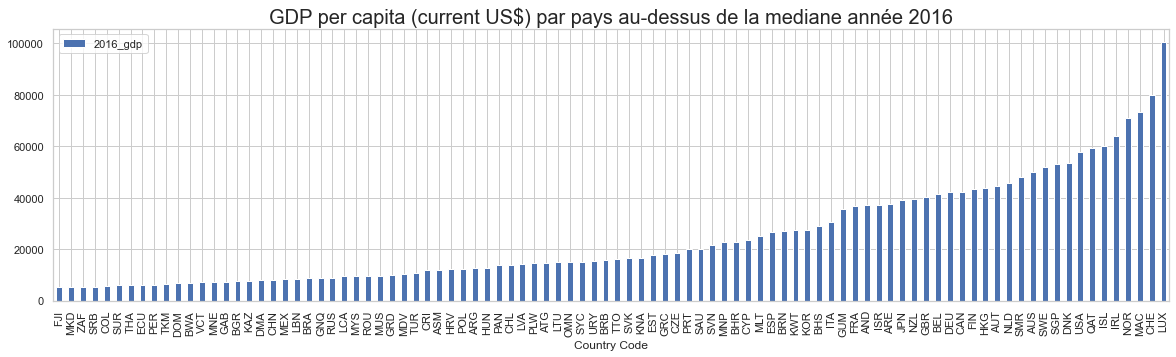

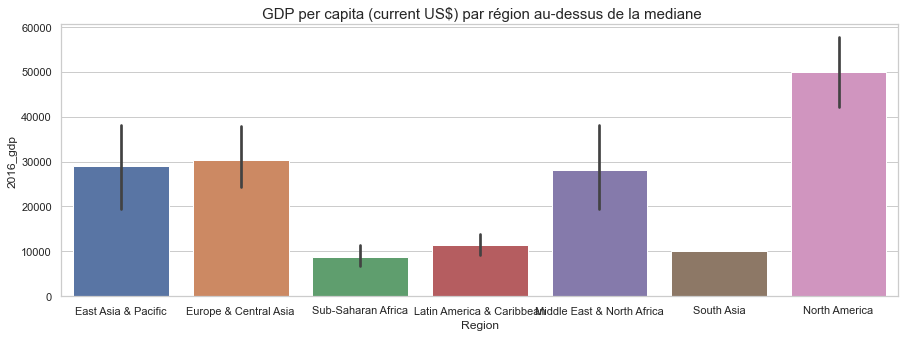

In [114]:

gdp_c_flt = gdp_c_flt.sort_values(by=["2016_gdp"])
gdp_c_flt.plot(kind ='bar', x ='Country Code',y ='2016_gdp', figsize = (20, 5))
plt.title('GDP per capita (current US$) par pays au-dessus de la mediane année 2016', size=20)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.barplot(x = gdp_c_flt['Region'], y = gdp_c_flt['2016_gdp'])
plt.title(' GDP per capita (current US$) par région au-dessus de la mediane' , size=15)
plt.show()

   # 3. 4 Quatrième indicateur : BAR.TER.CMPT.25UP.ZS

    * Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary
    
***les dernières statistique qui concernent cet indicateur se trouvent que pour l'année 2010, donc on prend cette année pour faire notre analyse.***

In [115]:
countries["Country Name"].unique().shape

(217,)

In [116]:
bar_ter_code = ["BAR.TER.CMPT.25UP.ZS"]
bar_ter = countries["Indicator Code"].isin(bar_ter_code)
bar_ter = countries[bar_ter]
bar_ter.shape

(217, 52)

In [117]:
bar_ter = bar_ter[["Country Name","Country Code","2010", "Region"]].copy()
bar_ter_c = bar_ter
bar_ter_c = bar_ter_c.rename({"2010":"bar_ter_2010"},axis = "columns")
bar_ter_c = bar_ter_c.dropna()
bar_ter_c.shape

(144, 4)

In [118]:
bar_ter_c = bar_ter_c.sort_values(by=["bar_ter_2010"])

Text(0.5, 1.0, 'Percentage of population age 25+ with tertiary schooling')

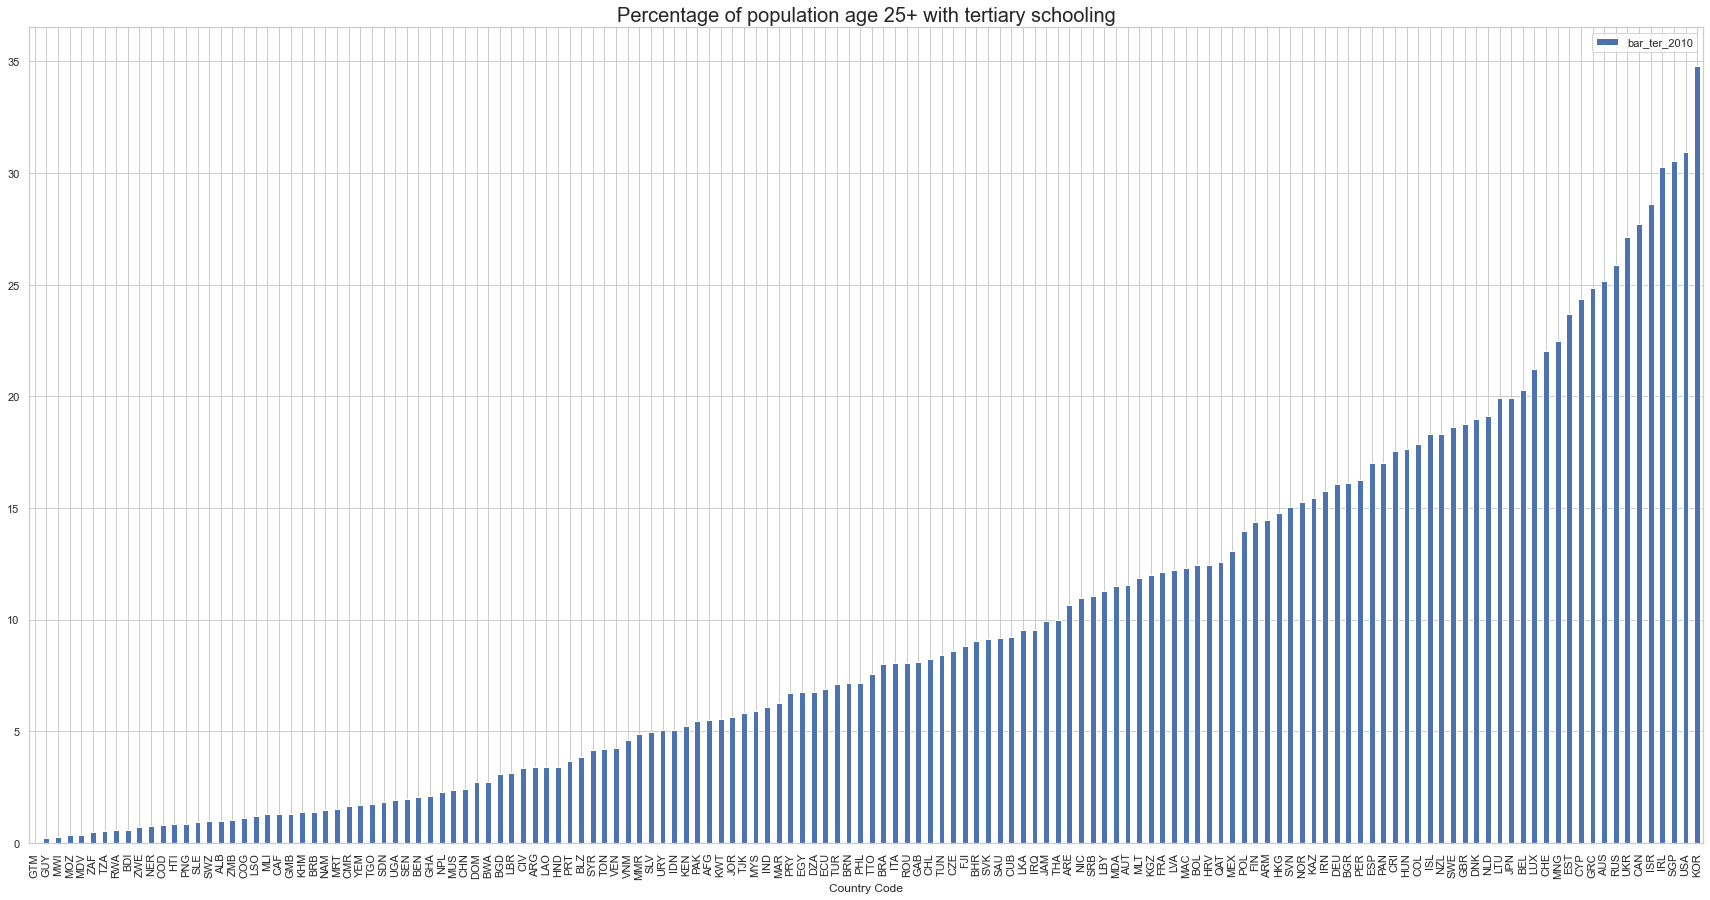

In [119]:
#sns.set(style="whitegrid")
#plt.figure(figsize=(60, 30))
#sns.barplot(x = bar_ter_c['Country Code'],y=bar_ter_c['bar_ter_2010'])
#plt.title(' Percentage of population age 25+ with tertiary schooling' , size=50)
#plt.show()

bar_ter_c.plot(kind ='bar', x ='Country Code',y ='bar_ter_2010', figsize = (30, 15))
plt.title('Percentage of population age 25+ with tertiary schooling', size=20)#

In [120]:
bar_ter_c.describe()

,bar_ter_2010
count,144.000000
mean,9.505347
std,8.213294
min,0.010000
25%,2.355000
50%,7.370000
75%,14.832500
max,34.790000


In [121]:
seuil_bar_ter= float(bar_ter.median())

In [122]:
bar_ter_flt= bar_ter_c[bar_ter_c["bar_ter_2010"] > seuil_bar_ter]
bar_ter_flt.shape

(72, 4)

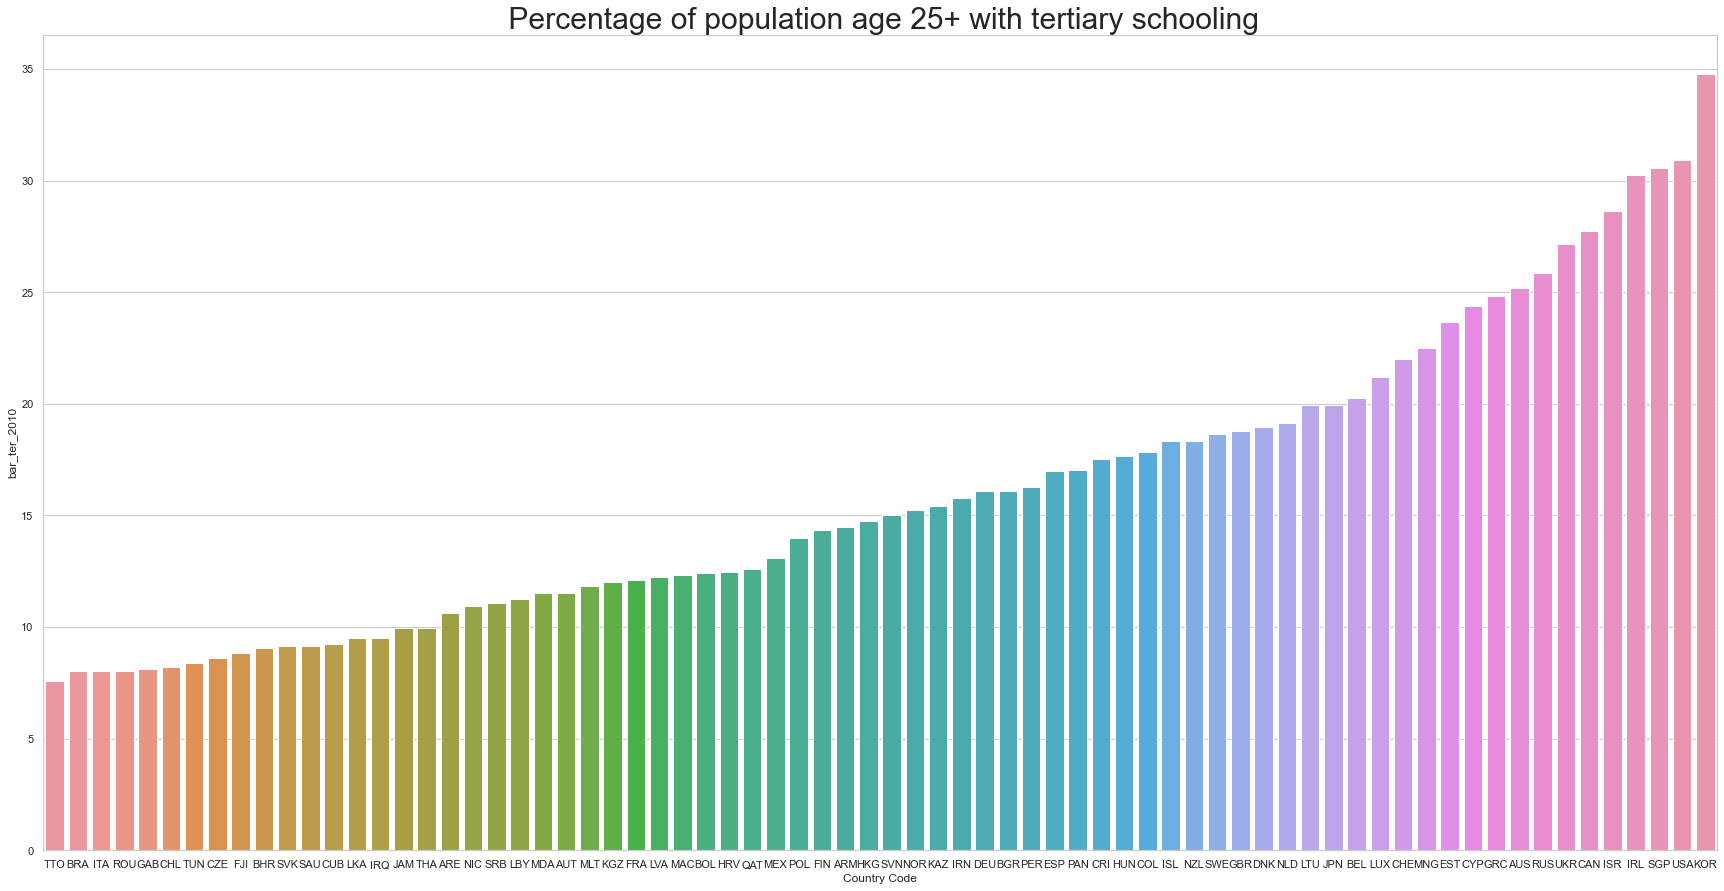

In [123]:

plt.figure(figsize=(30, 15))
sns.barplot(x = bar_ter_flt['Country Code'],y=bar_ter_flt['bar_ter_2010'])
plt.title(' Percentage of population age 25+ with tertiary schooling' , size=30)
plt.show()

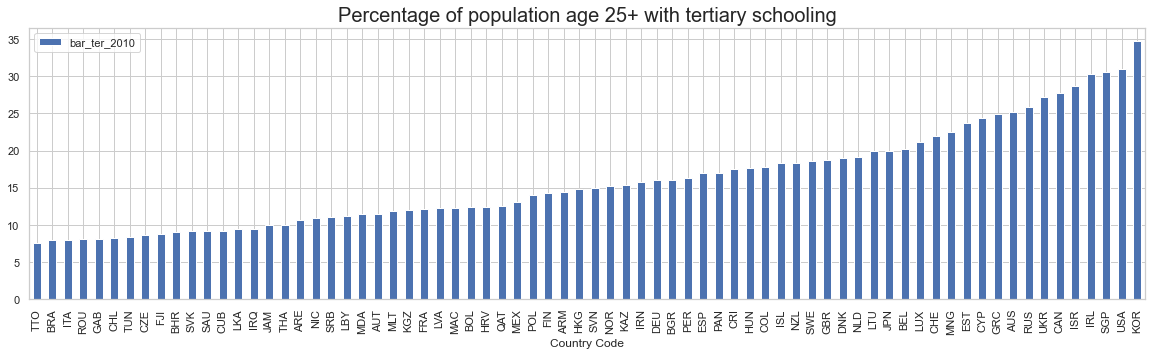

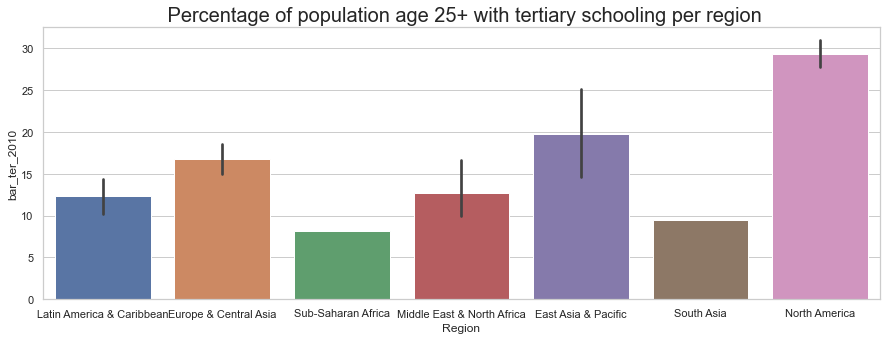

In [124]:
#bar_ter_flt = bar_ter_flt.sort_values(by=["bar_ter_2010"])
bar_ter_flt.plot(kind ='bar', x ='Country Code',y ='bar_ter_2010', figsize = (20, 5))
plt.title('Percentage of population age 25+ with tertiary schooling', size=20)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.barplot(x = bar_ter_flt['Region'], y = bar_ter_flt['bar_ter_2010'])
plt.title(' Percentage of population age 25+ with tertiary schooling per region' , size=20)
plt.show()

In [125]:
all_indicator = gdp_int_pop.merge(bar_ter_c, how = 'outer')
all_indicator.shape

(210, 7)

In [126]:
all_indicator

,Country Name,Country Code,2016_pop_tot,Region,2016_int_usrs,2016_gdp,bar_ter_2010
0,Afghanistan,AFG,34656032.0,South Asia,10.595726,561.778746,5.51
1,Albania,ALB,2876101.0,Europe & Central Asia,66.363445,4124.982390,0.99
2,Algeria,DZA,40606052.0,Middle East & North Africa,42.945527,3916.881571,6.77
3,American Samoa,ASM,55599.0,East Asia & Pacific,NaN,11834.745229,NaN
4,Andorra,AND,77281.0,Europe & Central Asia,97.930637,36988.622030,NaN
...,...,...,...,...,...,...,...
205,Zimbabwe,ZWE,16150362.0,Sub-Saharan Africa,23.119989,1029.076649,0.71
206,Eritrea,ERI,NaN,Sub-Saharan Africa,1.177119,NaN,NaN
207,Kuwait,KWT,NaN,Middle East & North Africa,78.367384,27359.230330,5.54
208,Serbia,SRB,NaN,Europe & Central Asia,67.056841,5426.897946,11.07


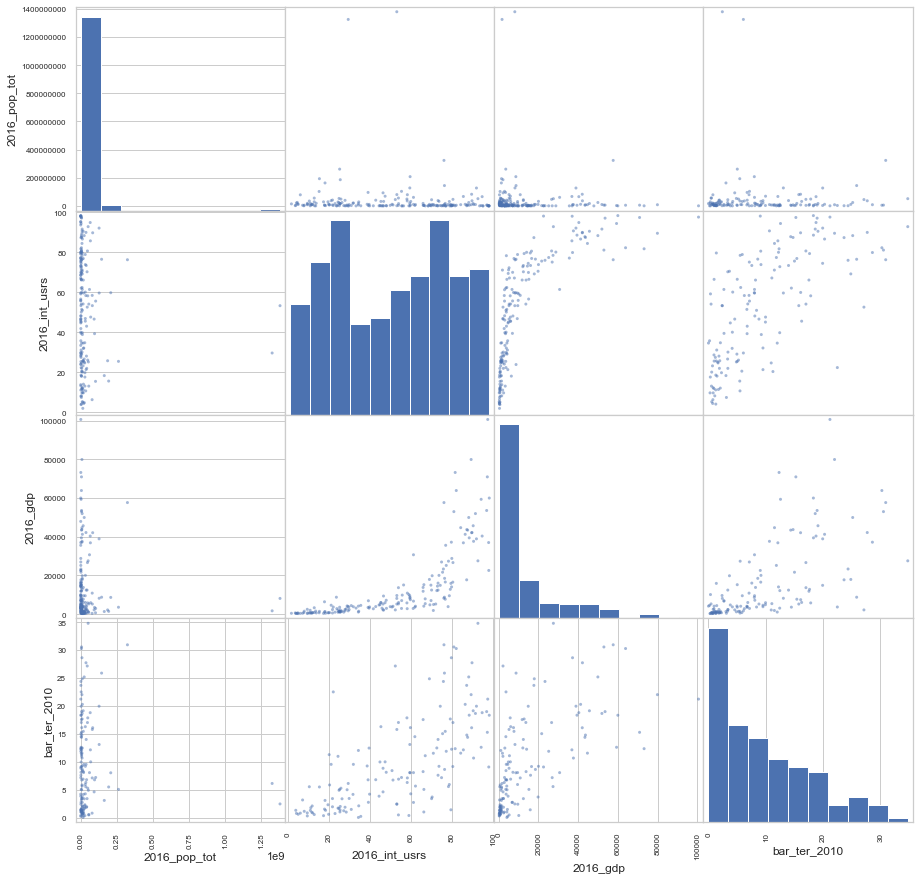

In [127]:
scatter_matrix(all_indicator, figsize =(15, 15))
plt.show()

In [128]:
all_indicator_flt = gdp_int_pop_flt["Country Code"].isin(bar_ter_flt["Country Code"])
all_indicator_flt = gdp_int_pop_flt[all_indicator_flt]
all_indicator_flt


,Country Name,Country Code,2016_gdp,Region
129520,Australia,AUS,49927.819509,East Asia & Pacific
133185,Austria,AUT,44676.345835,Europe & Central Asia
158840,Belgium,BEL,41236.266589,Europe & Central Asia
188160,Brazil,BRA,8649.948492,Latin America & Caribbean
199155,Bulgaria,BGR,7469.025247,Europe & Central Asia
221145,Canada,CAN,42157.927991,North America
239470,Chile,CHL,13792.926054,Latin America & Caribbean
246800,Colombia,COL,5805.605385,Latin America & Caribbean
283450,Czech Republic,CZE,18491.940112,Europe & Central Asia
338425,France,FRA,36854.968280,Europe & Central Asia


In [129]:
all_indic_flt = all_indicator["Country Code"].isin(all_indicator_flt["Country Code"])
all_indic_flt = all_indicator[all_indic_flt]
all_indic_flt

,Country Name,Country Code,2016_pop_tot,Region,2016_int_usrs,2016_gdp,bar_ter_2010
10,Australia,AUS,24127159.0,East Asia & Pacific,88.238658,49927.819509,25.18
11,Austria,AUT,8747358.0,Europe & Central Asia,84.323331,44676.345835,11.53
18,Belgium,BEL,11348159.0,Europe & Central Asia,86.516500,41236.266589,20.27
26,Brazil,BRA,207652865.0,Latin America & Caribbean,59.682747,8649.948492,8.01
28,Bulgaria,BGR,7127822.0,Europe & Central Asia,59.825548,7469.025247,16.10
34,Canada,CAN,36286425.0,North America,89.840000,42157.927991,27.72
39,Chile,CHL,17909754.0,Latin America & Caribbean,66.010000,13792.926054,8.22
41,Colombia,COL,48653419.0,Latin America & Caribbean,58.136494,5805.605385,17.85
50,Czech Republic,CZE,10561633.0,Europe & Central Asia,76.481201,18491.940112,8.61
64,France,FRA,66896109.0,Europe & Central Asia,85.622200,36854.968280,12.12


In [130]:
lst_fnl_flt = pd.DataFrame(columns =["Country Name","Country Code","Region","nb_users_int","nb_bar_ter", "2016_gdp", ])
lst_fnl_flt

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp


In [131]:
lst_fnl_flt["Country Name"] = all_indic_flt["Country Name"]
lst_fnl_flt["Country Code"] = all_indic_flt["Country Code"]
lst_fnl_flt["Region"] = all_indic_flt["Region"]

lst_fnl_flt["nb_users_int"] = all_indic_flt["2016_pop_tot"]* all_indic_flt["2016_int_usrs"]/100
lst_fnl_flt["nb_bar_ter"] = all_indic_flt["2016_pop_tot"]*all_indic_flt["bar_ter_2010"]/100
lst_fnl_flt["2016_gdp"] = all_indic_flt["2016_gdp"]


lst_fnl_flt

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp
10,Australia,AUS,East Asia & Pacific,2.128948e+07,6.075219e+06,49927.819509
11,Austria,AUT,Europe & Central Asia,7.376064e+06,1.008570e+06,44676.345835
18,Belgium,BEL,Europe & Central Asia,9.818030e+06,2.300272e+06,41236.266589
26,Brazil,BRA,Latin America & Caribbean,1.239329e+08,1.663299e+07,8649.948492
28,Bulgaria,BGR,Europe & Central Asia,4.264259e+06,1.147579e+06,7469.025247
34,Canada,CAN,North America,3.259972e+07,1.005860e+07,42157.927991
39,Chile,CHL,Latin America & Caribbean,1.182223e+07,1.472182e+06,13792.926054
41,Colombia,COL,Latin America & Caribbean,2.828539e+07,8.684635e+06,5805.605385
50,Czech Republic,CZE,Europe & Central Asia,8.077664e+06,9.093566e+05,18491.940112
64,France,FRA,Europe & Central Asia,5.727792e+07,8.107808e+06,36854.968280


# 3. 5 Cinquième indicateur : UIS.E.3  , UIS.E.3 ,  SE.TER.ENRL                                                                                                       


### Les données prises de l'année 2011pour les trois inducteurs qui représentent le nombre d'étudiant sur les trois cycles

        * UIS.E.3    : 	Enrolment in upper secondary education, both sexes (number)
        * UIS.E.4    :  Enrolment in post-secondary non-tertiary education, both sexes (number)
        * SE.TER.ENRL:  Enrolment in tertiary education, all programmes, both sexes (number)

In [132]:
UIS_3_code = ["UIS.E.3"]
UIS_4_code = ["UIS.E.4"]
SE_TER_code = ["SE.TER.ENRL"]

In [133]:
UIS_3 = countries["Indicator Code"].isin(UIS_3_code)
UIS_3 = countries[UIS_3]
UIS_4 = countries["Indicator Code"].isin(UIS_4_code)
UIS_4 = countries[UIS_4]
SE_TER = countries["Indicator Code"].isin(SE_TER_code)
SE_TER= countries[SE_TER]

In [134]:
UIS_3 = UIS_3[["Country Name","Country Code","2011","Region"]].rename({"2011":"UIS.E.3"},axis = "columns")

UIS_4 = UIS_4[["Country Name","Country Code","2011","Region"]].rename({"2011":"UIS.E.4"},axis = "columns")

SE_TER = SE_TER[["Country Name","Country Code","2011","Region"]].rename({"2011":"SE.TER.ENRL"},axis = "columns")

In [135]:
new_indict = UIS_3.merge(UIS_4, how = 'outer')
new_indict = new_indict.merge(SE_TER, how = 'outer')

new_indict["totale"] = new_indict.sum(axis=1)
new_indict= new_indict.sort_values(by="totale", ascending = False)
new_indict.shape

(217, 7)

In [136]:

seuil_indict = float(new_indict["totale"].median())
new_indict = new_indict[new_indict["totale"] > seuil_indict]
new_indict

,Country Name,Country Code,UIS.E.3,Region,UIS.E.4,SE.TER.ENRL,totale
88,India,IND,51671416.0,South Asia,NaN,26650952.0,78322368.0
41,China,CHN,44543976.0,East Asia & Pacific,182866.0,31308378.0,76035220.0
206,United States,USA,11809382.0,North America,571998.0,21016126.0,33397506.0
26,Brazil,BRA,9395813.0,Latin America & Caribbean,NaN,6929324.0,16325137.0
89,Indonesia,IDN,8844295.0,East Asia & Pacific,NaN,5364301.0,14208596.0
...,...,...,...,...,...,...,...
170,Singapore,SGP,NaN,East Asia & Pacific,NaN,236891.0,236891.0
150,Panama,PAN,103272.0,Latin America & Caribbean,NaN,133497.0,236769.0
8,Armenia,ARM,92824.0,Europe & Central Asia,NaN,141455.0,234279.0
129,Moldova,MDA,96131.0,Europe & Central Asia,2184.0,128988.0,227303.0


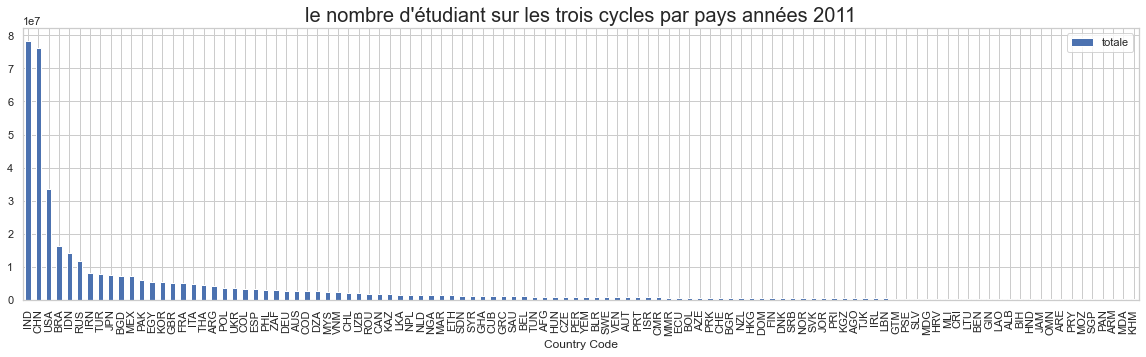

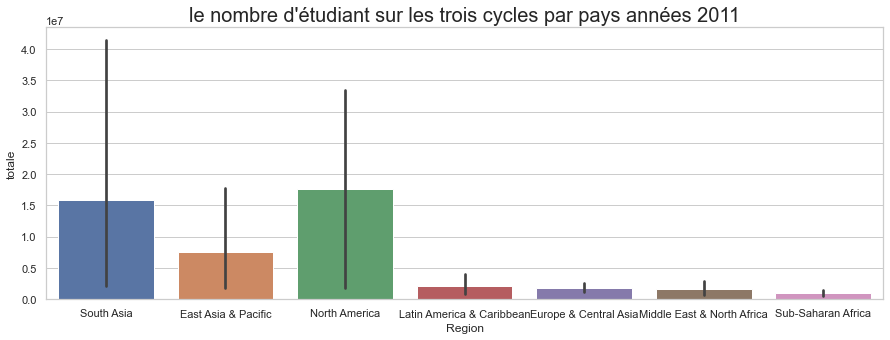

In [137]:
#bar_ter_flt = bar_ter_flt.sort_values(by=["bar_ter_2010"])
new_indict.plot(kind ='bar', x ='Country Code',y ='totale', figsize = (20, 5))
plt.title('le nombre d\'étudiant sur les trois cycles par pays années 2011', size=20)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.barplot(x = new_indict['Region'], y = new_indict['totale'])
plt.title('le nombre d\'étudiant sur les trois cycles par pays années 2011' , size=20)
plt.show()

In [138]:
lst_fnl_flt = lst_fnl_flt.merge(new_indict, how = "outer")
lst_fnl_flt = lst_fnl_flt.drop(columns =["SE.TER.ENRL","UIS.E.4","UIS.E.3"])
lst_fnl_flt = lst_fnl_flt.rename({"totale":"nb_students"},axis = "columns").dropna()
lst_fnl_flt.shape

(31, 7)

In [139]:
from scipy import stats 
for col in ["nb_users_int","nb_bar_ter","2016_gdp", "nb_students" ]:    
    lst_fnl_flt[col] = lst_fnl_flt[col]/lst_fnl_flt[col].sum()

lst_fnl_flt_c = lst_fnl_flt
lst_fnl_flt

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp,nb_students
0,Australia,AUS,East Asia & Pacific,0.016921,0.018961,0.053904,0.020180
1,Austria,AUT,Europe & Central Asia,0.005863,0.003148,0.048234,0.006122
2,Belgium,BEL,Europe & Central Asia,0.007804,0.007179,0.044520,0.007798
3,Brazil,BRA,Latin America & Caribbean,0.098504,0.051913,0.009339,0.125688
4,Bulgaria,BGR,Europe & Central Asia,0.003389,0.003582,0.008064,0.004532
5,Canada,CAN,North America,0.025911,0.031394,0.045515,0.013905
6,Chile,CHL,Latin America & Caribbean,0.009397,0.004595,0.014891,0.015718
7,Colombia,COL,Latin America & Caribbean,0.022482,0.027105,0.006268,0.025198
8,Czech Republic,CZE,Europe & Central Asia,0.006420,0.002838,0.019965,0.006947
9,France,FRA,Europe & Central Asia,0.045526,0.025305,0.039790,0.037925


In [140]:
lst_fnl_flt['moyenne'] = stats.gmean(lst_fnl_flt.iloc[:, 3:6], axis=1)
lst_fnl_flt['moyenne'] = lst_fnl_flt['moyenne']/ lst_fnl_flt['moyenne'].max()
lst_fnl_flt= lst_fnl_flt.sort_values(by="moyenne", ascending = False)
lst_fnl_flt

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp,nb_students,moyenne
30,United States,USA,North America,0.195643,0.312033,0.062228,0.257129,1.000000
16,Japan,JPN,East Asia & Pacific,0.092863,0.079034,0.041998,0.058357,0.432925
10,Germany,DEU,Europe & Central Asia,0.058903,0.041488,0.045420,0.020986,0.308002
23,Russian Federation,RUS,Europe & Central Asia,0.087661,0.116546,0.009445,0.090516,0.293958
29,United Kingdom,GBR,Europe & Central Asia,0.049444,0.038473,0.043554,0.039427,0.279392
18,"Korea, Rep.",KOR,East Asia & Pacific,0.037764,0.055644,0.029732,0.040861,0.254306
3,Brazil,BRA,Latin America & Caribbean,0.098504,0.051913,0.009339,0.125688,0.232518
9,France,FRA,Europe & Central Asia,0.045526,0.025305,0.039790,0.037925,0.229366
5,Canada,CAN,North America,0.025911,0.031394,0.045515,0.013905,0.213604
19,Mexico,MEX,Latin America & Caribbean,0.060357,0.052067,0.008862,0.055193,0.194265


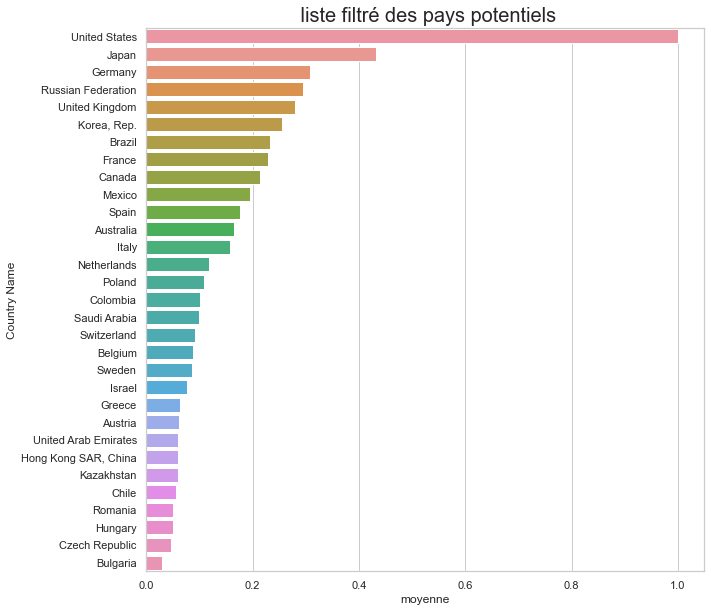

In [141]:
plt.figure(figsize=(10, 10))
sns.barplot(y = lst_fnl_flt['Country Name'],x=lst_fnl_flt['moyenne'])
plt.title(' liste filtré des pays potentiels' , size=20)
plt.show()

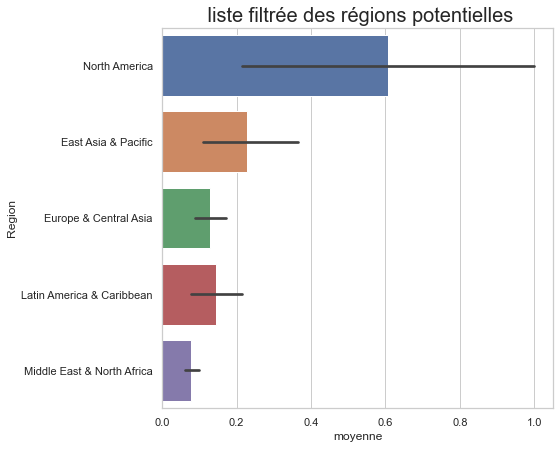

In [142]:
plt.figure(figsize=(7, 7))
sns.barplot(y = lst_fnl_flt['Region'],x=lst_fnl_flt['moyenne'])
plt.title(' liste filtrée des régions potentielles' , size=20)
plt.show()

array([[<AxesSubplot:xlabel='nb_users_int', ylabel='nb_users_int'>,
        <AxesSubplot:xlabel='nb_bar_ter', ylabel='nb_users_int'>,
        <AxesSubplot:xlabel='2016_gdp', ylabel='nb_users_int'>,
        <AxesSubplot:xlabel='nb_students', ylabel='nb_users_int'>],
       [<AxesSubplot:xlabel='nb_users_int', ylabel='nb_bar_ter'>,
        <AxesSubplot:xlabel='nb_bar_ter', ylabel='nb_bar_ter'>,
        <AxesSubplot:xlabel='2016_gdp', ylabel='nb_bar_ter'>,
        <AxesSubplot:xlabel='nb_students', ylabel='nb_bar_ter'>],
       [<AxesSubplot:xlabel='nb_users_int', ylabel='2016_gdp'>,
        <AxesSubplot:xlabel='nb_bar_ter', ylabel='2016_gdp'>,
        <AxesSubplot:xlabel='2016_gdp', ylabel='2016_gdp'>,
        <AxesSubplot:xlabel='nb_students', ylabel='2016_gdp'>],
       [<AxesSubplot:xlabel='nb_users_int', ylabel='nb_students'>,
        <AxesSubplot:xlabel='nb_bar_ter', ylabel='nb_students'>,
        <AxesSubplot:xlabel='2016_gdp', ylabel='nb_students'>,
        <AxesSubplot:xlabel='nb

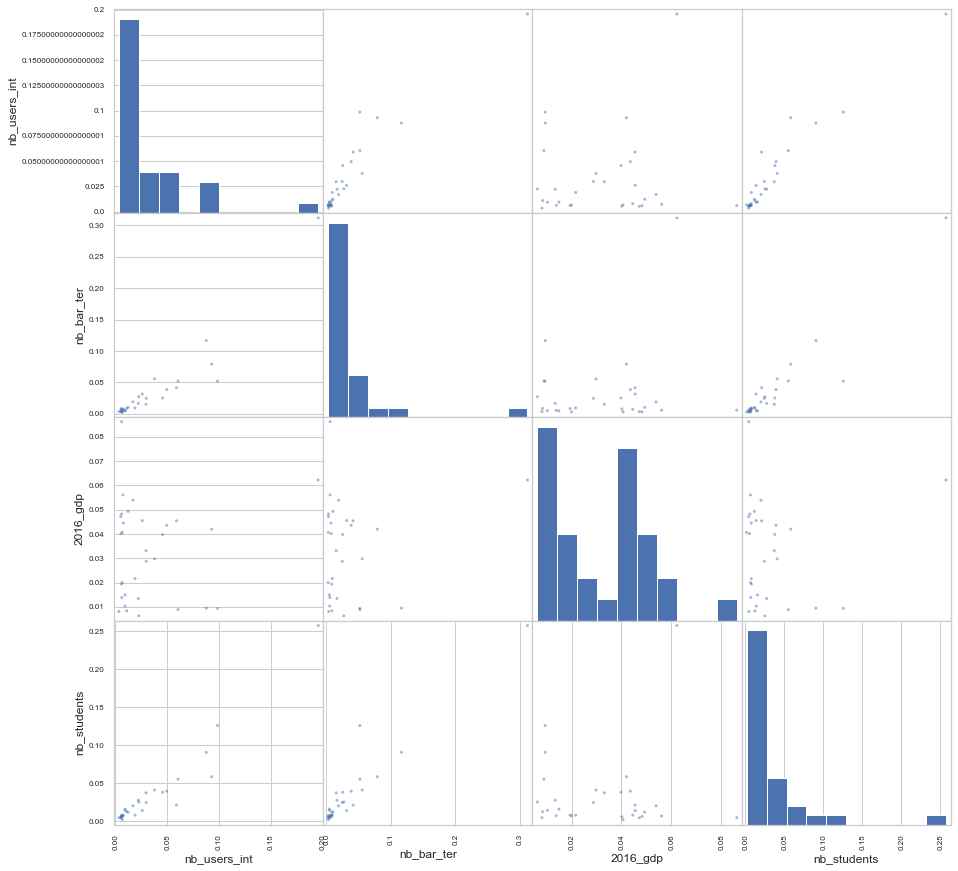

In [143]:
lst_fnl_flt_c = lst_fnl_flt_c.drop(columns = ['moyenne'])
scatter_matrix(lst_fnl_flt_c, figsize =(15, 15))


In [144]:
lst_fnl_flt_c.corr()

,nb_users_int,nb_bar_ter,2016_gdp,nb_students
nb_users_int,1.000000,0.932682,0.090034,0.955775
nb_bar_ter,0.932682,1.000000,0.170128,0.945059
2016_gdp,0.090034,0.170128,1.000000,0.062712
nb_students,0.955775,0.945059,0.062712,1.000000


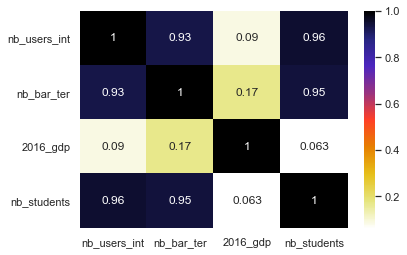

In [145]:
cor = lst_fnl_flt_c.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)
plt.show()

In [146]:
all_indicator

,Country Name,Country Code,2016_pop_tot,Region,2016_int_usrs,2016_gdp,bar_ter_2010
0,Afghanistan,AFG,34656032.0,South Asia,10.595726,561.778746,5.51
1,Albania,ALB,2876101.0,Europe & Central Asia,66.363445,4124.982390,0.99
2,Algeria,DZA,40606052.0,Middle East & North Africa,42.945527,3916.881571,6.77
3,American Samoa,ASM,55599.0,East Asia & Pacific,NaN,11834.745229,NaN
4,Andorra,AND,77281.0,Europe & Central Asia,97.930637,36988.622030,NaN
...,...,...,...,...,...,...,...
205,Zimbabwe,ZWE,16150362.0,Sub-Saharan Africa,23.119989,1029.076649,0.71
206,Eritrea,ERI,NaN,Sub-Saharan Africa,1.177119,NaN,NaN
207,Kuwait,KWT,NaN,Middle East & North Africa,78.367384,27359.230330,5.54
208,Serbia,SRB,NaN,Europe & Central Asia,67.056841,5426.897946,11.07


In [147]:
new_indict = new_indict[new_indict["totale"]> 0]
new_indict.shape

(108, 7)

In [148]:
new_indict_c = new_indict[new_indict["totale"]> 1000000]
new_indict_c.shape

(49, 7)

Text(0.5, 1.0, "Nombre d'étudiants de tous les cycles par pays")

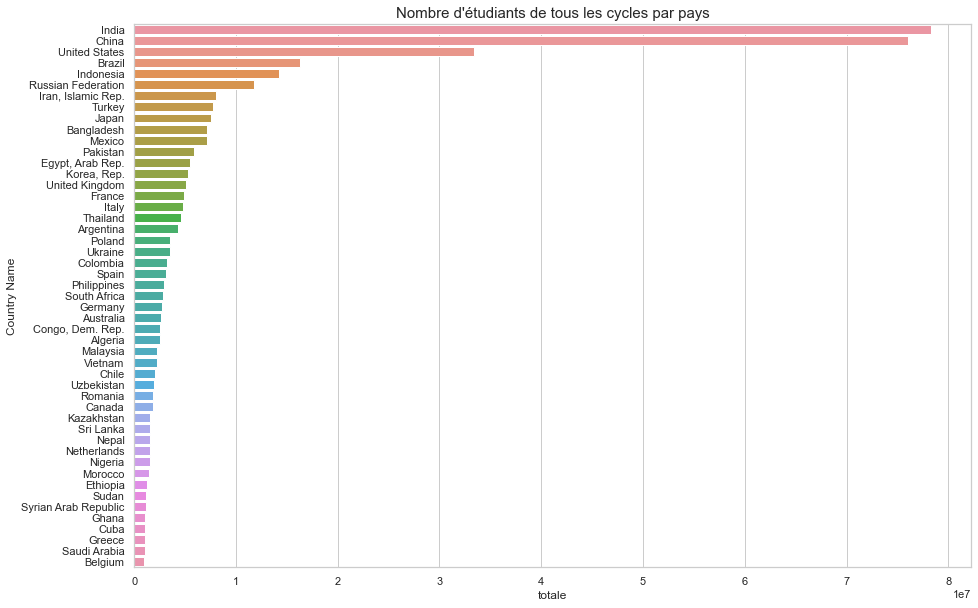

In [149]:
plt.figure(figsize=(15, 10))
sns.barplot(y = new_indict_c['Country Name'],x=new_indict_c['totale'])
plt.title("Nombre d\'étudiants de tous les cycles par pays" , size=15)


In [150]:
all_indicator

,Country Name,Country Code,2016_pop_tot,Region,2016_int_usrs,2016_gdp,bar_ter_2010
0,Afghanistan,AFG,34656032.0,South Asia,10.595726,561.778746,5.51
1,Albania,ALB,2876101.0,Europe & Central Asia,66.363445,4124.982390,0.99
2,Algeria,DZA,40606052.0,Middle East & North Africa,42.945527,3916.881571,6.77
3,American Samoa,ASM,55599.0,East Asia & Pacific,NaN,11834.745229,NaN
4,Andorra,AND,77281.0,Europe & Central Asia,97.930637,36988.622030,NaN
...,...,...,...,...,...,...,...
205,Zimbabwe,ZWE,16150362.0,Sub-Saharan Africa,23.119989,1029.076649,0.71
206,Eritrea,ERI,NaN,Sub-Saharan Africa,1.177119,NaN,NaN
207,Kuwait,KWT,NaN,Middle East & North Africa,78.367384,27359.230330,5.54
208,Serbia,SRB,NaN,Europe & Central Asia,67.056841,5426.897946,11.07


In [151]:
lst_fnl= pd.DataFrame(columns =["Country Name","Country Code","Region","nb_users_int","nb_bar_ter", "2016_gdp"])
lst_fnl

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp


In [152]:
lst_fnl["Country Name"] = all_indicator["Country Name"]
lst_fnl["Country Code"] = all_indicator["Country Code"]
lst_fnl["Region"] = all_indicator["Region"]

# Le nombre d'utilisateurs internet par pays (pop_tot * nb_users_inter per 100)
lst_fnl["nb_users_int"] = all_indicator["2016_pop_tot"]* all_indicator["2016_int_usrs"]/100

# Le nombre de de jeunes diplomés par pays (bar_ter_2010 * pop_tot / 100)
lst_fnl["nb_bar_ter"]   = all_indicator["2016_pop_tot"]*all_indicator["bar_ter_2010"]/100
lst_fnl["2016_gdp"]     = all_indicator["2016_gdp"]

# Le nombre d'inscription dans l'enseignement "Secondaire", "Supérieur" et "postsecondaire", la sommes des trois déja calculé

lst_fnl

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp
0,Afghanistan,AFG,South Asia,3.672058e+06,1.909547e+06,561.778746
1,Albania,ALB,Europe & Central Asia,1.908680e+06,2.847340e+04,4124.982390
2,Algeria,DZA,Middle East & North Africa,1.743848e+07,2.749030e+06,3916.881571
3,American Samoa,ASM,East Asia & Pacific,NaN,NaN,11834.745229
4,Andorra,AND,Europe & Central Asia,7.568178e+04,NaN,36988.622030
...,...,...,...,...,...,...
205,Zimbabwe,ZWE,Sub-Saharan Africa,3.733962e+06,1.146676e+05,1029.076649
206,Eritrea,ERI,Sub-Saharan Africa,NaN,NaN,NaN
207,Kuwait,KWT,Middle East & North Africa,NaN,NaN,27359.230330
208,Serbia,SRB,Europe & Central Asia,NaN,NaN,5426.897946


In [153]:
lst_fnl_new = lst_fnl.merge(new_indict, how = 'outer')
lst_fnl_new = lst_fnl_new.drop(columns= ["UIS.E.3","SE.TER.ENRL","UIS.E.4"]).rename({"totale":"nb_students"},axis = "columns")
lst_fnl_new.copy()

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp,nb_students
0,Afghanistan,AFG,South Asia,3.672058e+06,1.909547e+06,561.778746,917878.0
1,Albania,ALB,Europe & Central Asia,1.908680e+06,2.847340e+04,4124.982390,285011.0
2,Algeria,DZA,Middle East & North Africa,1.743848e+07,2.749030e+06,3916.881571,2521146.0
3,American Samoa,ASM,East Asia & Pacific,NaN,NaN,11834.745229,NaN
4,Andorra,AND,Europe & Central Asia,7.568178e+04,NaN,36988.622030,NaN
...,...,...,...,...,...,...,...
205,Zimbabwe,ZWE,Sub-Saharan Africa,3.733962e+06,1.146676e+05,1029.076649,NaN
206,Eritrea,ERI,Sub-Saharan Africa,NaN,NaN,NaN,NaN
207,Kuwait,KWT,Middle East & North Africa,NaN,NaN,27359.230330,NaN
208,Serbia,SRB,Europe & Central Asia,NaN,NaN,5426.897946,515494.0


In [154]:
lst_fnl_new = lst_fnl_new.dropna()

# Puis normaliser mes variables afin de simplifier et calculer la "moyenne"par la suite

lst_fnl_new

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp,nb_students
0,Afghanistan,AFG,South Asia,3.672058e+06,1.909547e+06,561.778746,917878.0
1,Albania,ALB,Europe & Central Asia,1.908680e+06,2.847340e+04,4124.982390,285011.0
2,Algeria,DZA,Middle East & North Africa,1.743848e+07,2.749030e+06,3916.881571,2521146.0
7,Argentina,ARG,Latin America & Caribbean,3.075931e+07,1.482043e+06,12440.320982,4312167.0
8,Armenia,ARM,Europe & Central Asia,1.813386e+06,4.235134e+05,3614.688357,234279.0
...,...,...,...,...,...,...,...
194,United Arab Emirates,ARE,Middle East & North Africa,8.398269e+06,9.872137e+05,37622.207456,244070.0
195,United Kingdom,GBR,Europe & Central Asia,6.220822e+07,1.232667e+07,40341.408246,5121022.0
196,United States,USA,North America,2.461480e+08,9.997565e+07,57638.159088,33397506.0
201,Vietnam,VNM,East Asia & Pacific,4.310601e+07,4.254980e+06,2214.387662,2229494.0


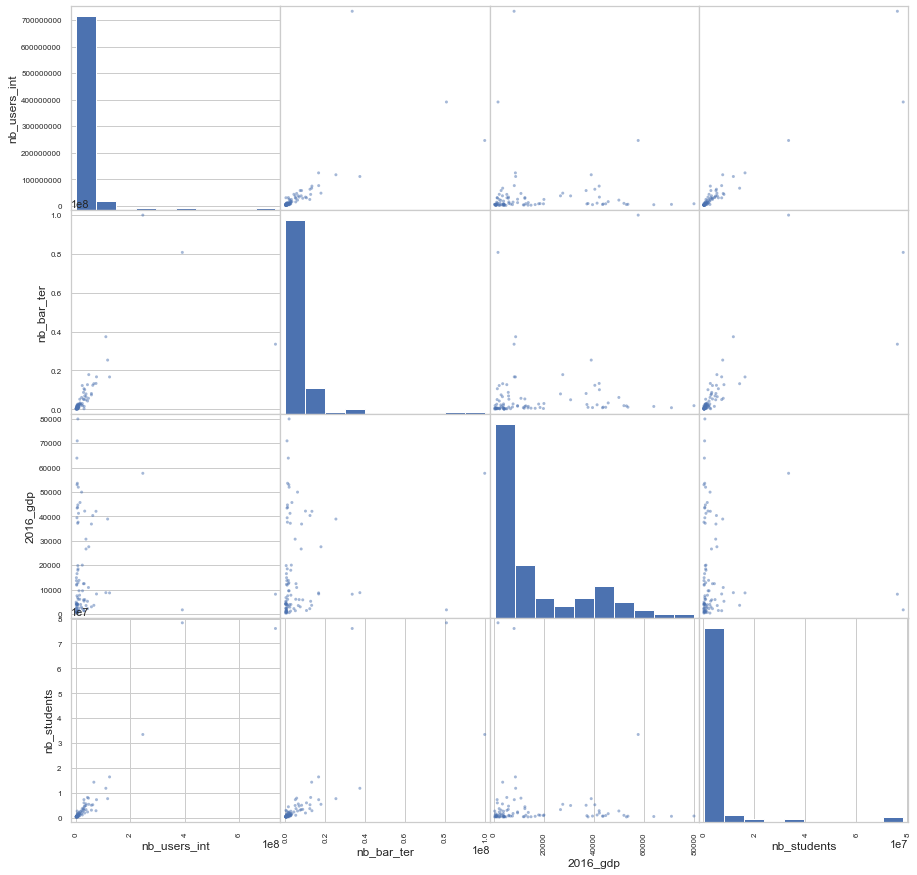

In [155]:
scatter_matrix(lst_fnl_new, figsize =(15, 15))
plt.show()

In [156]:
for col in ["nb_users_int","nb_bar_ter","2016_gdp","nb_students"]:    
    lst_fnl_new[col] = lst_fnl_new[col]/lst_fnl_new[col].sum()
    #lst_fnl_new[col] = (lst_fnl_new[col]-lst_fnl_new[col].min()) / (lst_fnl_new[col].max() - lst_fnl_new[col].min())
lst_fnl_new.shape

(90, 7)

In [157]:
lst_fnl_new

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp,nb_students
0,Afghanistan,AFG,South Asia,0.001177,0.003401,0.000374,0.002387
1,Albania,ALB,Europe & Central Asia,0.000612,0.000051,0.002747,0.000741
2,Algeria,DZA,Middle East & North Africa,0.005592,0.004896,0.002608,0.006557
7,Argentina,ARG,Latin America & Caribbean,0.009863,0.002640,0.008284,0.011215
8,Armenia,ARM,Europe & Central Asia,0.000581,0.000754,0.002407,0.000609
...,...,...,...,...,...,...,...
194,United Arab Emirates,ARE,Middle East & North Africa,0.002693,0.001758,0.025052,0.000635
195,United Kingdom,GBR,Europe & Central Asia,0.019947,0.021954,0.026863,0.013319
196,United States,USA,North America,0.078926,0.178061,0.038381,0.086860
201,Vietnam,VNM,East Asia & Pacific,0.013822,0.007578,0.001475,0.005798


In [158]:
# Maintenant on calcule la moyenne géométrique, 
lst_fnl_new['moyenne'] = stats.gmean(lst_fnl_new.iloc[:, 3:6], axis=1)
lst_fnl_new['moyenne'] = lst_fnl_new['moyenne']/ lst_fnl_new['moyenne'].max()
lst_fnl_new= lst_fnl_new.sort_values(by="moyenne", ascending = False)
lst_fnl_new

,Country Name,Country Code,Region,nb_users_int,nb_bar_ter,2016_gdp,nb_students,moyenne
196,United States,USA,North America,0.078926,0.178061,0.038381,0.086860,1.000000
40,China,CHN,East Asia & Pacific,0.235176,0.059668,0.005409,0.197751,0.520140
93,Japan,JPN,East Asia & Pacific,0.037462,0.045101,0.025904,0.019713,0.432925
84,India,IND,South Asia,0.125453,0.143863,0.001138,0.203699,0.336467
69,Germany,DEU,Europe & Central Asia,0.023763,0.023675,0.028014,0.007089,0.308002
...,...,...,...,...,...,...,...,...
117,Mali,MLI,Sub-Saharan Africa,0.000641,0.000407,0.000519,0.000847,0.006310
20,Benin,BEN,Sub-Saharan Africa,0.000418,0.000401,0.000526,0.000780,0.005466
1,Albania,ALB,Europe & Central Asia,0.000612,0.000051,0.002747,0.000741,0.005407
129,Mozambique,MOZ,Sub-Saharan Africa,0.001620,0.000169,0.000254,0.000622,0.005059


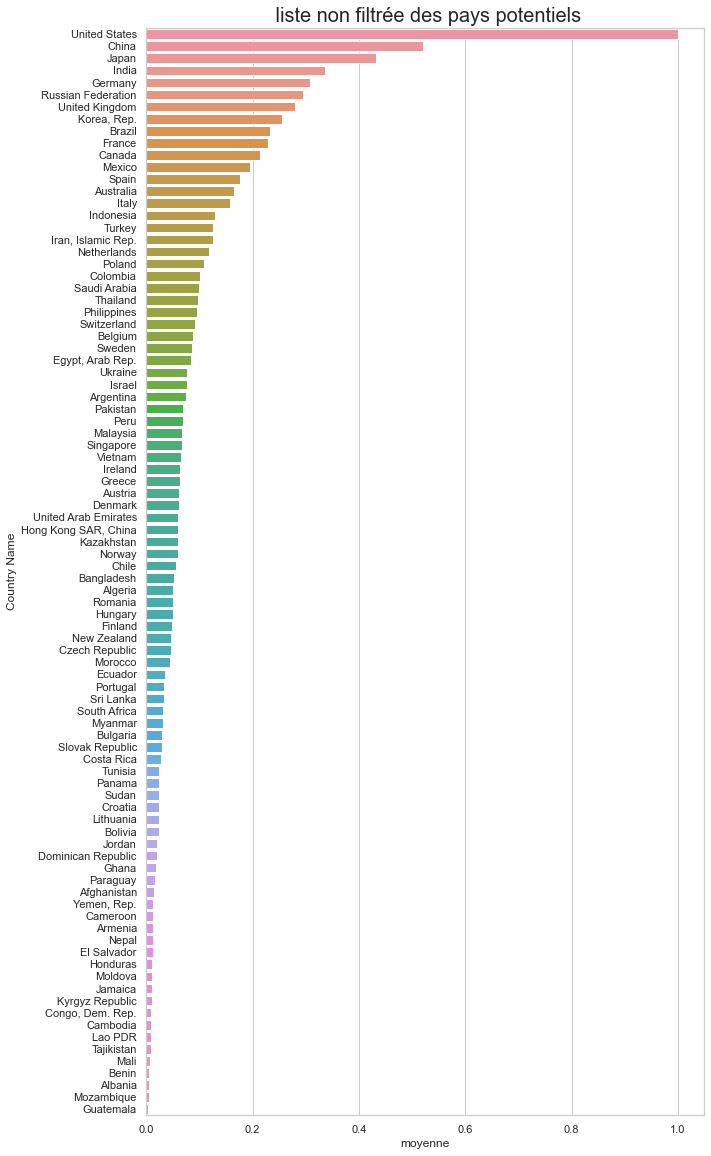

In [159]:
plt.figure(figsize=(10, 20))
sns.barplot(y = lst_fnl_new['Country Name'],x=lst_fnl_new['moyenne'])
plt.title(' liste non filtrée des pays potentiels' , size=20)
plt.show()

# les pays avec un fort potentiel de clients par order

   *  1. United States
   *  2. China
   *  3. Japan
   *  4. India
   *  5. Germany
   *  6. Russian Federation
   *  7. United Kingdom
   *  8. Korea, Rep.
   *  9. Brazil
   *  10. France

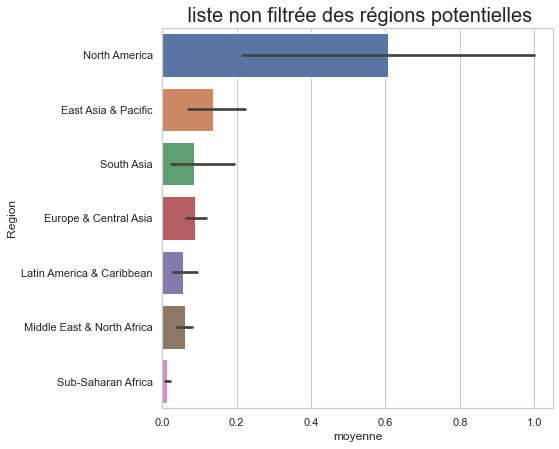

In [160]:
plt.figure(figsize=(7, 7))
sns.barplot(y = lst_fnl_new['Region'],x=lst_fnl_new['moyenne'])
plt.title(' liste non filtrée des régions potentielles' , size=20)
plt.show()

In [161]:
"""En dessous la liste des pays sélectionnés par rapport aux plusieurs indicateurs

    Enttre la liste des pays filtrée avec la median, on trouve pas la chine et l'inde car le score de pénétration d'internet 
    est en dessous de la median.
"""
lst_fnl_new["Country Name"].head(10)

196         United States
40                  China
93                  Japan
84                  India
69                Germany
154    Russian Federation
195        United Kingdom
99            Korea, Rep.
26                 Brazil
64                 France
Name: Country Name, dtype: object

# 4.  L’évolution du potentiel de clients par pays:

###  En fonction de nombre des étudiants par cycle ainsi que la pénétration d'internet 
        
        * ['IT.NET.USER.P2','UIS.E.3' , 'UIS.E.4' , 'SE.TER.ENRL']


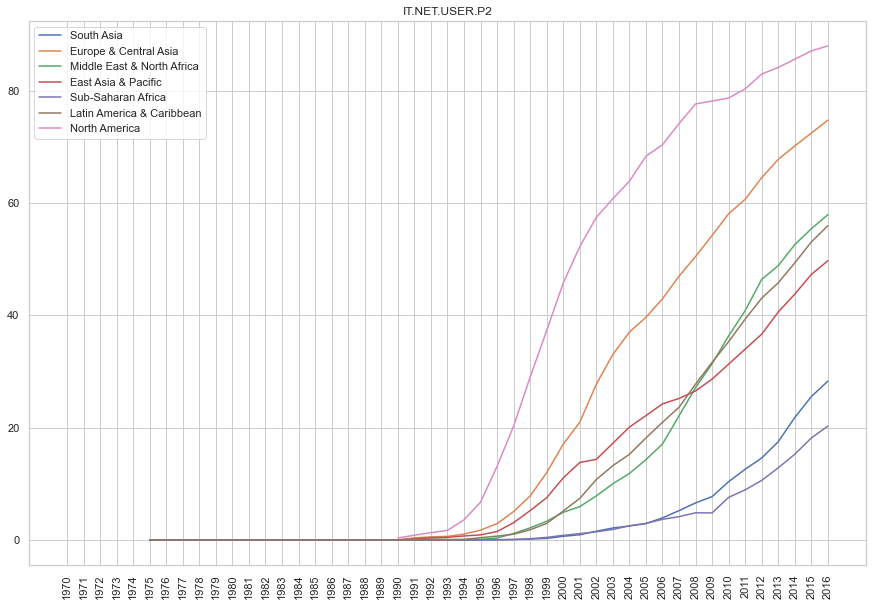

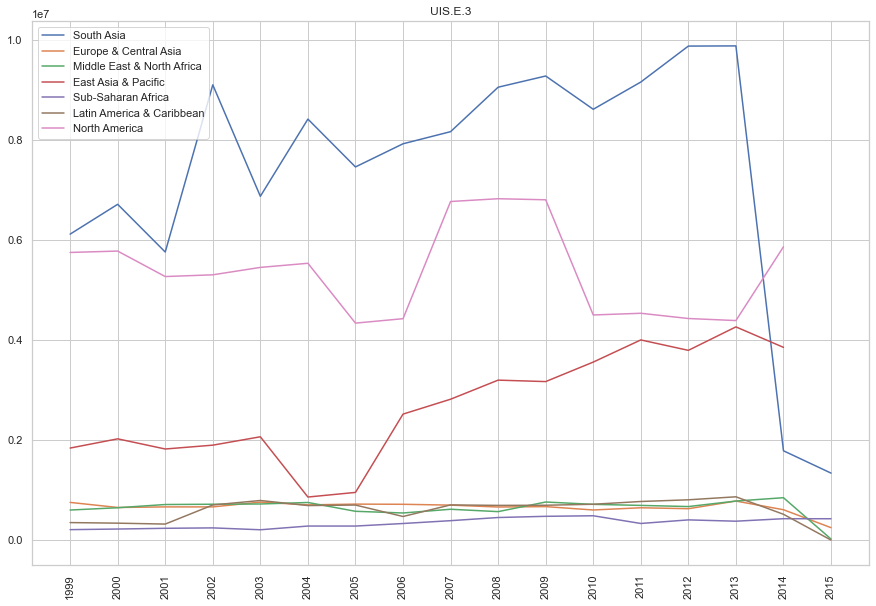

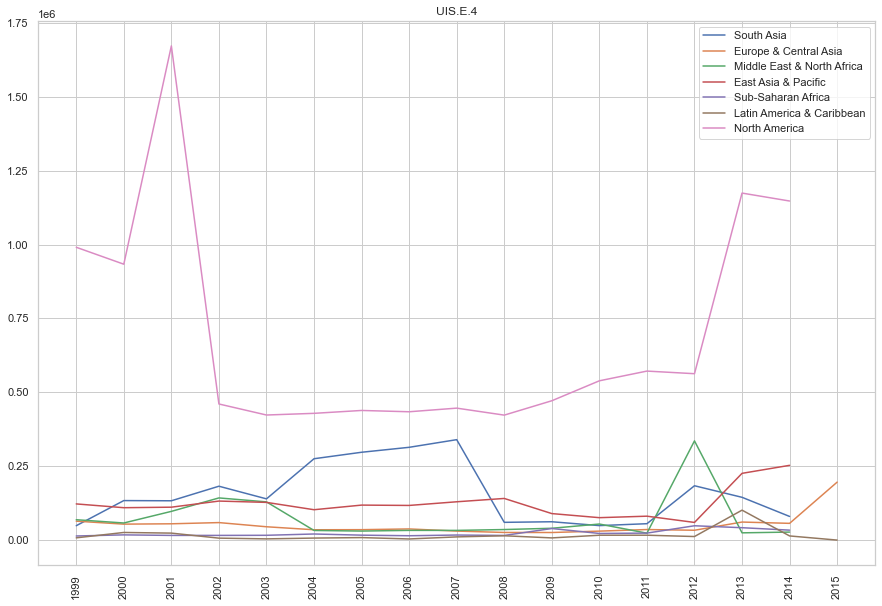

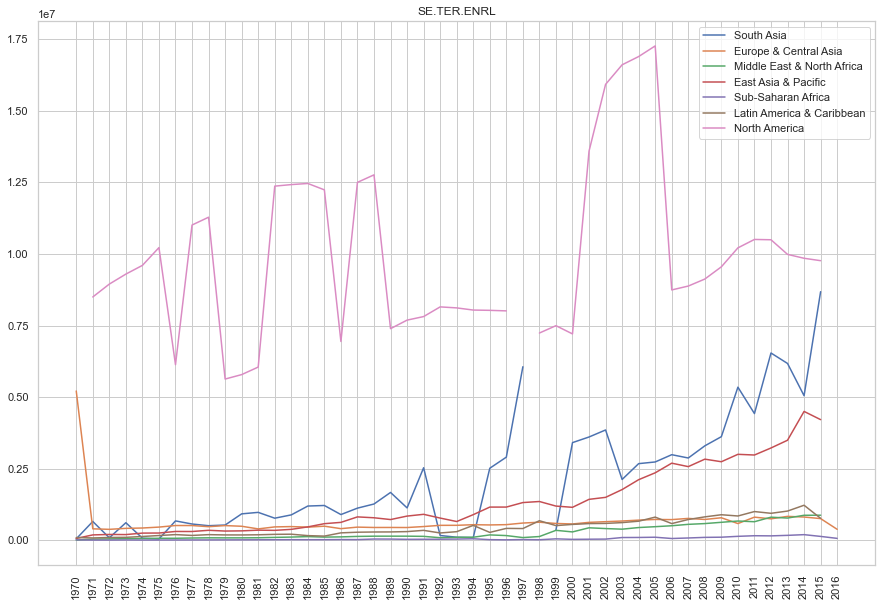

In [162]:
regions_var = countries.groupby(['Region','Indicator Code']).mean(numeric_only=True)
regions_var

indicateurs = ['IT.NET.USER.P2','UIS.E.3' , 'UIS.E.4' , 'SE.TER.ENRL']
for indicateur in indicateurs:
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes()
    plt.title(indicateur)
    degrees = 90
    plt.xticks(rotation=degrees)
    for region in countries['Region'].dropna().unique():
        if len(regions_var.loc[region,indicateur].dropna())> 0:
            ax.plot(regions_var.loc[region,indicateur], label=region)
            plt.legend()